# Draw variants on Karyoplots

One plot for each cell line DMPs  
Two different colours for modkit and minfi  
Separate plot for DMRs  
Don't colour regions  
Annotate peaks on one track  
Annotate genes on another track


In [1]:
library("karyoploteR", "BSgenome", "GenomicRanges")
library("data.table")


Warning message in library("karyoploteR", "BSgenome", "GenomicRanges"):
“‘GenomicRanges’ not found on search path, using pos = 2”
Loading required package: regioneR

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb


Attaching package: 'data.table'


The following object is masked from 'package:GenomicRanges':

    shift


The fo

In [2]:
# T2T genome ideogram
ideogram_table <- read.table("/home/dejlu879/20240731-BEBIC_dmr/plotting/ideogram.T2T.bed", sep = "\t", header = TRUE)
ideogram_gr <- GRanges(ideogram_table)

In [12]:
# Colours
modkit_colour = "#d550b8"
minfi_colour = "#9dd14b"

## Plot SW780

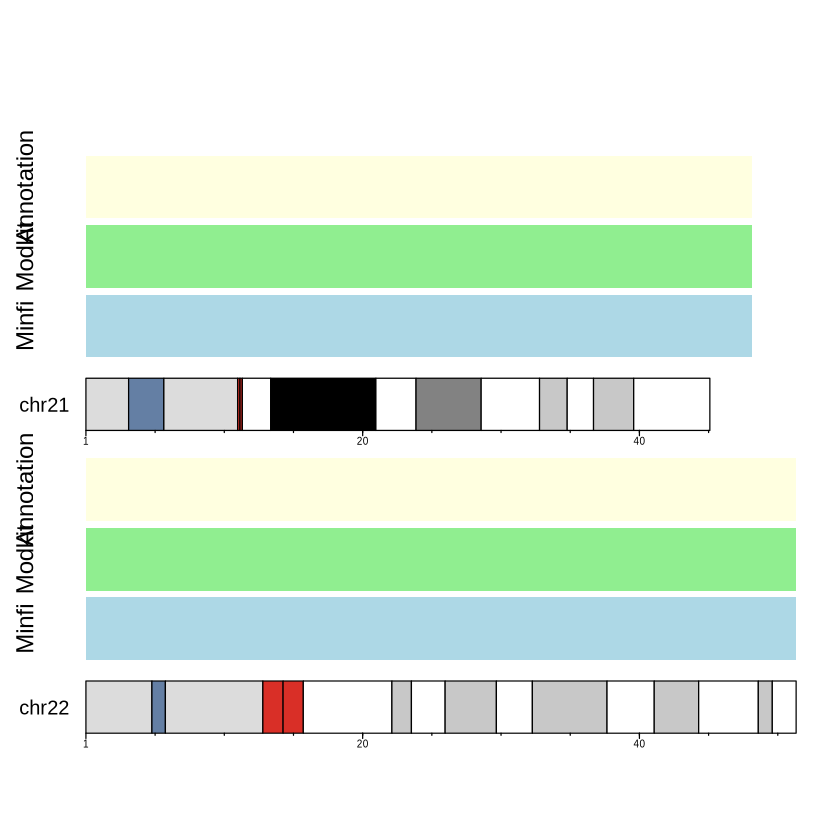

In [13]:
pp <- getDefaultPlotParams(plot.type = 1)

kplot <- plotKaryotype(
    cytobands = ideogram_gr, plot.type = 1, plot.params = pp,
    chromosomes = c("chr21", "chr22")  #, cex = 2, labels.plotter = NULL
)
# kpAddChromosomeNames(kplot, xoffset = -0.03, cex = 1.5)
kpAddBaseNumbers(kplot)

minfi_track = autotrack(current.track = 1, total.tracks = 3, margin = 0.1)
kpAddLabels(kplot, labels = "Minfi", pos = 1, label.margin = 0.08, srt = 90, cex = 1.2, r0 = minfi_track$r0, r1 = minfi_track$r1)
kpDataBackground(kplot, r0 = minfi_track$r0, r1 = minfi_track$r1, color = "lightblue")

modkit_track = autotrack(current.track = 2, total.tracks = 3, margin = 0.1)
kpAddLabels(kplot, labels = "Modkit", pos=1, label.margin = 0.08, srt=90, cex = 1.2, r0=modkit_track$r0, r1=modkit_track$r1)
kpDataBackground(kplot, r0 = modkit_track$r0, r1 = modkit_track$r1, color = "lightgreen")

annot_track = autotrack(current.track = 3, total.tracks = 3, margin = 0.1)
kpAddLabels(kplot, labels = "Annotation", pos=1, label.margin = 0.08, srt=90, cex = 1.2, r0=annot_track$r0, r1=annot_track$r1)
kpDataBackground(kplot, r0 = annot_track$r0, r1 = annot_track$r1, color = "lightyellow")



### Load annotation info

In [1]:
library("GenomicRanges")
library("data.table")
library("dplyr")
library("AnnotationHub")
library("GenomicFeatures")
library("stringr")

library("karyoploteR", "BSgenome", "GenomicRanges")

# library("stringr")
# library(org.Hs.eg.db)

Loading required package: stats4

Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb


Attaching package: ‘data.table’


The following object is masked from ‘package:GenomicRanges’:

    shift


The fo

In [2]:
# T2T genome ideogram
ideogram_table <- read.table("/home/dejlu879/20240731-BEBIC_dmr/plotting/ideogram.T2T.bed", sep = "\t", header = TRUE)
ideogram_gr <- GRanges(ideogram_table)

In [3]:
# Annotation file
annotations_T2T_fp = "/home/dejlu879/refs/T2T/chm13v2.0_RefSeq_Liftoff_v5.2.gff3.gz"
# Extract genes from the TxDb
annotations_T2T = txdbmaker::makeTxDbFromGFF(annotations_T2T_fp)
genes_txdb <- genes(annotations_T2T) # 'txdb' is TxDb object

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .extract_transcripts_from_GRanges(tx_IDX, gr, mcols0$type, mcols0$ID, :
"some transcripts have no "transcript_id" attribute ==> their name
  ("tx_name" column in the TxDb object) was set to NA"
Warning message in .extract_transcripts_from_GRanges(tx_IDX, gr, mcols0$type, mcols0$ID, :
"the transcript names ("tx_name" column in the TxDb object) imported
  from the "transcript_id" attribute are not unique"
Warning message in .find_exon_cds(exons, cds):
"The following transcripts have exons that contain more than one CDS
  (only the first CDS was kept for each exon): NM_001134939.1,
  NM_001172437.2, NM_001184961.1, NM_001301020.1, NM_001301302.1,
  NM_001301371.1, NM_002537.3, NM_004152.3, NM_015068.3, NM_016178.2"
OK



In [15]:
genes_txdb

GRanges object with 45281 ranges and 1 metadata column:
           seqnames              ranges strand |     gene_id
              <Rle>           <IRanges>  <Rle> | <character>
      A1BG    chr19   61441599-61449907      - |        A1BG
  A1BG-AS1    chr19   61448385-61451599      + |    A1BG-AS1
      A1CF    chr10   51648044-51734261      - |        A1CF
       A2M    chr12     9049893-9098416      - |         A2M
   A2M-AS1    chr12     9047362-9050240      + |     A2M-AS1
       ...      ...                 ...    ... .         ...
    ZYG11A     chr1   52724272-52776522      + |      ZYG11A
    ZYG11B     chr1   52607957-52708870      + |      ZYG11B
       ZYX     chr7 144736772-144746538      + |         ZYX
     ZZEF1    chr17     3893649-4032280      - |       ZZEF1
      ZZZ3     chr1   77401275-77522228      - |        ZZZ3
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

Run for all significance

In [ ]:
# Filter genes to those identified in my data

tests_to_check <- c('test2', 'test4', 'test6', 'test7', 'test10', 'test11', 'test12')
# removed 'test9'
CpG_tests <- c('test2', 'test6')
AGG_tests <- c('test4', 'test7')
C_tests <- c('test9', 'test10')
A_tests <- c('test11', 'test12')
BEBIC_B_tests <- c('test2', 'test4', 'test9', 'test11')
BEBIC_C_tests <- c('test6', 'test7', 'test10', 'test12')

modkit_score_8 <- c('test2', 'test6')
modkit_score_1 <- c('test10')
modkit_score_6 <- c('test4')
modkit_score_2 <- c('test7', 'test11', 'test12')
minfi_score_50 <- c('test2')
minfi_score_100 <- c('test6')
minfi_score_10 <- c('test4', 'test10')
minfi_score_20 <- c('test7', 'test11', 'test12')

# encode_macs2peak_dir = "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed"
# bed_files <- list.files(path = encode_macs2peak_dir, pattern = "\\.bed$", full.names = TRUE)

get_vars <- function(name_of_test) {
    if (name_of_test %in% BEBIC_B_tests) {
    bebic <- 'BEBIC_B'
    # exp_list <- exp_lists[[1]]
    } else if (name_of_test %in% BEBIC_C_tests) {
    bebic <- 'BEBIC_C'
    # exp_list <- exp_lists[[2]]
    } else {
    stop('test not associated with a bebic')
    }

    if (name_of_test %in% CpG_tests) {
            modBase <- 'C'
            motif <- 'CpG'
        } else if (name_of_test %in% AGG_tests) {
            modBase <- 'A'
            motif <- 'AGG'
        } else if (name_of_test %in% C_tests) {
            modBase <- 'C'
            motif <- 'C'
        } else if (name_of_test %in% A_tests) {
            modBase <- 'A'
            motif <- 'A'
        } else {
            stop('test not associated with a motif')
    }

    if (name_of_test %in% modkit_score_8) {
            modkit_score <- 8
        } else if (name_of_test %in% modkit_score_1) {
            modkit_score <- 1
        } else if (name_of_test %in% modkit_score_6) {
            modkit_score <- 6
        } else if (name_of_test %in% modkit_score_2) {
            modkit_score <- 2
        } else {
            stop('test not associated with a score')
    }

    if (name_of_test %in% minfi_score_50) {
            minfi_score <- 50
        } else if (name_of_test %in% minfi_score_100) {
            minfi_score <- 100
        } else if (name_of_test %in% minfi_score_10) {
            minfi_score <- 10
        } else if (name_of_test %in% minfi_score_20) {
            minfi_score <- 20
        } else {
            stop('test not associated with a score')
    }

    path2_output = paste0("/home/dejlu879/20240731-BEBIC_dmr/pipeline_", name_of_test, "/output_data/")

    return(list(bebic = bebic, modBase = modBase, motif = motif, path2_output = path2_output, modkit_score = modkit_score, minfi_score = minfi_score))
}


get_encode_file_list <- function() {
    encode_macs2peak_dir = "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed"
    bed_files <- list.files(path = encode_macs2peak_dir, pattern = "\\.bed$", full.names = TRUE)

    file_list = list()

    for (file in bed_files) {
        # Extract the filename without the path
        filename <- basename(file)

        # Extract the "name" part from the filename (between "_" and ".")
        name <- str_extract(filename, "(?<=_)[^_]+(?=\\.)")
        file_list[[name]] <- file
    }
    return(file_list)
}


In [7]:
printf <- function(text) {
    print(text)
    flush.console()
}

In [251]:
order_my_chroms <- function(my_chrom_list) {
    chromosome_order <- c(paste0("chr", 1:22), "chrX", "chrY", "chrM")
    ordered_chromosomes <- factor(my_chrom_list, levels = chromosome_order)
    ordered_chromosomes <- sort(ordered_chromosomes)
    ordered_chromosomes <- as.character(ordered_chromosomes)
    return(ordered_chromosomes)
}

In [80]:
# Function to replace all but the last dot with a hyphen
replace_dots <- function(name) {
    sub("\\.(?=[^.]*$)", "TEMP_REPLACE", name, perl = TRUE) %>%
        gsub("\\.", "-", .) %>%
        gsub("TEMP_REPLACE", ".", .)
}


filter_to_score <- function(DMP_data, score) {
    print(head(DMP_data))  # Print the first few rows of DMP_data
    print(score)  # Print the score value
    # Filter genes to the top DMPs
    topDMPs <- DMP_data[DMP_data$score >= score, ]
    print(dim(topDMPs))
    return(topDMPs)
}


get_up_DMPs <- function(DMP_data, data_source) {
    # Get up methylated in BCG 
    if (data_source == 'modkit') {
        data <- DMP_data[balanced_effect_size < 0]
    } else {
        data <- DMP_data[balanced_effect_size > 0]
    }
    return(data)
}


get_down_DMPs <- function(DMP_data, data_source) {
    # Get down methylated in BCG 
    if (data_source == 'modkit') {
        data <- DMP_data[balanced_effect_size > 0]
    } else {
        data <- DMP_data[balanced_effect_size < 0]
    }
    return(data)
}

In [8]:
bed_files = get_encode_file_list()

In [164]:
# Function to process encode data
get_encode_data <- function(DMP_data_df) {
    # use a different colour for dif types of binding site

    ignore_columns = c('V1','seqnames','start','end','width','strand','balanced_effect_size','score','pval','name','also_in_other','gene_id','gene_id_strand','gene_description','EntrezID')

    # Get encode data
    printf("Getting encode data from DMP results")
    encode_data = list()
    columns = colnames(DMP_data_df)  # binding type is the colname
    for (colname in columns) {
        if (colname %in% ignore_columns) {
            # skip all data that's not encode
            next
        }

        # Get list of peaks noted for each encode dataset
        peaks = unique(DMP_data_df[[colname]])  # peak is in the row of the respective binding column

        # Add peaks to list
        if (length(peaks) > 0) {
            if (colname %in% names(encode_data)) {
                encode_data[[colname]] <- c(encode_data[[colname]], peaks)
            } else {
                encode_data[[colname]] <- peaks
            }
        }
    }

    # Somewhere the names were replaced by dots so the filename doesn't match unless I change the dots
    names(encode_data) = sapply(names(encode_data), replace_dots)

    # Actually get the data
    printf("getting coordinates for binding sites that overlap my DMPs")
    # Initialize an empty list to store the extracted data
    extracted_data <- list()
    i = 0
    for (colname in names(encode_data)) {
        # printf(colname)
        
        peaks <- encode_data[[colname]]
        if (length(peaks) == 1 && is.na(peaks)) {
            next
        }
        
        i = i+1
        # printf(paste0('------', i, '------'))

        peaks <- peaks[!is.na(peaks)]
        # printf(peaks)
        # printf(length(peaks))

        # strip X if it exists
        newname = sub("^X", "", colname)
        # printf(1)
        bed_file = bed_files[[newname]]  
        bed_data <- fread(bed_file)
        # printf(3)
        bed_data = makeGRangesFromDataFrame(
            bed_data, keep.extra.columns = TRUE, seqnames.field = c('chrom'), start.field = c('chromStart'), end.field = c('chromEnd'), strand.field = c('strand')
        )
        # printf(4)

        # Extract the "peak" information
        bed_data$peak_number <- gsub(".*_(peak_\\d+)$", "\\1", bed_data$name)
        # print(5)
        
        # Filter to relevant peaks
        filt_bed_data <- subset(bed_data, peak_number %in% peaks)
        # printf('filt_bed_data')
        # printf(length(filt_bed_data))
        filt_bed_data$encode_annot = newname
        # printf(filt_bed_data)

        # Extract the desired column and genomic locations
        extracted_gr <- filt_bed_data[, c("encode_annot")]
        # printf(extracted_gr)
        # Store the extracted GRanges object in the list
        extracted_data[[i]] <- extracted_gr
    }
    
    # Combine all extracted GRanges objects into one
    encode_annotations <- do.call(c, extracted_data)
    # printf(extracted_data)
    # printf(encode_annotations)

    # add column for binding type
    encode_annotations$bind_type <- sapply(strsplit(encode_annotations$encode_annot, "\\."), function(x) x[2])

    return(encode_annotations)
}

In [ ]:
# Function to plot karyplot
plot_karyoplot_for_BEBIC_test <- function(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_annotations, region_colours, my_topgenes_gr, genes_txdb, chroms) {
    # Plot Karyoplot
    pp <- getDefaultPlotParams(plot.type = 1)
    pp$ideogramheight <- 15
    pp$data1inmargin = 10
    pp$data1outmargin = 60
    pp$leftmargin = 0.2
    # print(pp)

    kplot <- plotKaryotype(
        cytobands = ideogram_gr, plot.type = 1, plot.params = pp,
        chromosomes = chroms, cex = 2)#, labels.plotter = NULL
        # chromosomes = c("chr21", "chr22")  #, cex = 2, labels.plotter = NULL
    # )
    # kpAddChromosomeNames(kplot, xoffset = -0.03, cex = 1.5)
    kpAddBaseNumbers(kplot)

    # Set tracks
    minfi_track = autotrack(current.track = 1, total.tracks = 4, margin = 0.1)
    minfi_down_track = autotrack(current.track = 1, total.tracks = 2, r0=minfi_track$r0, r1=minfi_track$r1)
    minfi_up_track = autotrack(current.track = 2, total.tracks = 2, r0=minfi_track$r0, r1=minfi_track$r1)
    modkit_track = autotrack(current.track = 2, total.tracks = 4, margin = 0.1)
    modkit_down_track = autotrack(current.track = 1, total.tracks = 2, r0=modkit_track$r0, r1=modkit_track$r1)
    modkit_up_track = autotrack(current.track = 2, total.tracks = 2, r0=modkit_track$r0, r1=modkit_track$r1)
    # adjust encode for size based on what dmp tracks do
    encode_track = autotrack(current.track = 3, total.tracks = 4, margin = 0.1)
    encode_actual_track = autotrack(current.track = 1, total.tracks = 2, r0=encode_track$r0, r1=encode_track$r1)
    encode_bottomgene_track = autotrack(current.track = 2, total.tracks = 2, r0=encode_track$r0, r1=encode_track$r1)  # gets the value for the bottom of the gene track relative to other tracks
    gene_track = autotrack(current.track = 4, total.tracks = 4, margin = 0.1)
    # gene_track_full = autotrack(current.track = c(4,5), total.tracks = 5, margin = 0.1)

    # Backgrounds
    kpDataBackground(kplot, r0 = minfi_track$r0, r1 = minfi_track$r1, color = "#eaeaea")
    kpDataBackground(kplot, r0 = encode_track$r0, r1 = encode_actual_track$r1, color = "#eaeaea")

    # Labels
    kpAddLabels(kplot, labels = "Minfi", pos = 1, label.margin = 0.08, srt = 0, cex = 1.2, r0 = minfi_track$r0, r1 = minfi_track$r1)
    kpAddLabels(kplot, labels = "Modkit", pos=1, label.margin = 0.08, srt=0, cex = 1.2, r0=modkit_track$r0, r1=modkit_track$r1)
    kpAddLabels(kplot, labels = "ENCODE", pos=1, label.margin = 0.08, srt=0, cex = 1.2, r0=encode_actual_track$r0, r1=encode_actual_track$r1)
    kpAddLabels(kplot, labels = "Genes", pos=1, label.margin = 0.08, srt=0, cex = 1.2, r0=encode_bottomgene_track$r0, r1=gene_track$r1)
    
    # Plot Minfi DMP track

    # kpDataBackground(kplot, r0 = minfi_track$r0, r1 = minfi_track$r1, color = "lightblue")
    kpPlotRegions(kplot, data=minfi_upDMP_gr, r0 = minfi_up_track$r0, r1 = minfi_up_track$r1, avoid.overlapping = FALSE, col = '#0072B2')
    kpPlotRegions(kplot, data=minfi_downDMP_gr, r0 = minfi_down_track$r1, r1 = minfi_down_track$r0, avoid.overlapping = FALSE, col = '#E69F00')
    kpAbline(kplot, h=0, r0 = minfi_up_track$r0, r1 = minfi_up_track$r1)

    # Plot Modkit DMP track
    # kpDataBackground(kplot, r0 = modkit_track$r0, r1 = modkit_track$r1, color = "lightgreen")
    kpPlotRegions(kplot, data=modkit_upDMP_gr, r0 = modkit_up_track$r0, r1 = modkit_up_track$r1, avoid.overlapping = FALSE, col = '#0072B2')
    kpPlotRegions(kplot, data=modkit_downDMP_gr, r0 = modkit_down_track$r1, r1 = modkit_down_track$r0, avoid.overlapping = FALSE, col = '#E69F00')
    kpAbline(kplot, h=0, r0 = modkit_up_track$r0, r1 = modkit_up_track$r1)

    # Plot ENCODE
    # kpDataBackground(kplot, r0 = encode_track$r0, r1 = encode_track$r1, color = "orange")
    kpPlotRegions(kplot, data=encode_annotations, r0 = encode_track$r0, r1 = encode_actual_track$r1, avoid.overlapping = FALSE, col = region_colours)  # r1 = encode_track$r1-0.05

    # kpDataBackground(kplot, r0 = gene_track_full$r0, r1 = gene_track_full$r1, color = "lightyellow")

    # kpPlotRegions(kplot, data=my_genes_gr, r0 = gene_track$r0, r1 = gene_track$r1-0.08, avoid.overlapping = FALSE)
    kpPlotMarkers(kplot, data=my_topgenes_gr, labels=my_topgenes_gr$gene_id, r0 = encode_bottomgene_track$r0, r1 = encode_bottomgene_track$r1)
}

In [14]:
new_names = names(bed_files)
new_names <- sapply(strsplit(new_names, "\\."), function(x) x[2])
new_names <- unique(new_names)
encode_colours = rainbow(length(new_names))
print(encode_colours)
names(encode_colours) <- new_names
print(encode_colours)

[1] "#FF0000" "#FFDB00" "#49FF00" "#00FF92" "#0092FF" "#4900FF" "#FF00DB"
     CTCF   H3K27ac  H3K27me3  H3K36me3   H3K4me1   H3K9me3   H3K4me3 
"#FF0000" "#FFDB00" "#49FF00" "#00FF92" "#0092FF" "#4900FF" "#FF00DB" 


In [221]:
options(repr.plot.width = 10.0, repr.plot.height = 7.0)

[1] "Getting encode data from DMP results"
[1] "getting coordinates for binding sites that overlap my DMPs"


[1] "Getting encode data from DMP results"
[1] "getting coordinates for binding sites that overlap my DMPs"
[1] "Getting encode data from DMP results"
[1] "getting coordinates for binding sites that overlap my DMPs"
[1] "Getting encode data from DMP results"
[1] "getting coordinates for binding sites that overlap my DMPs"


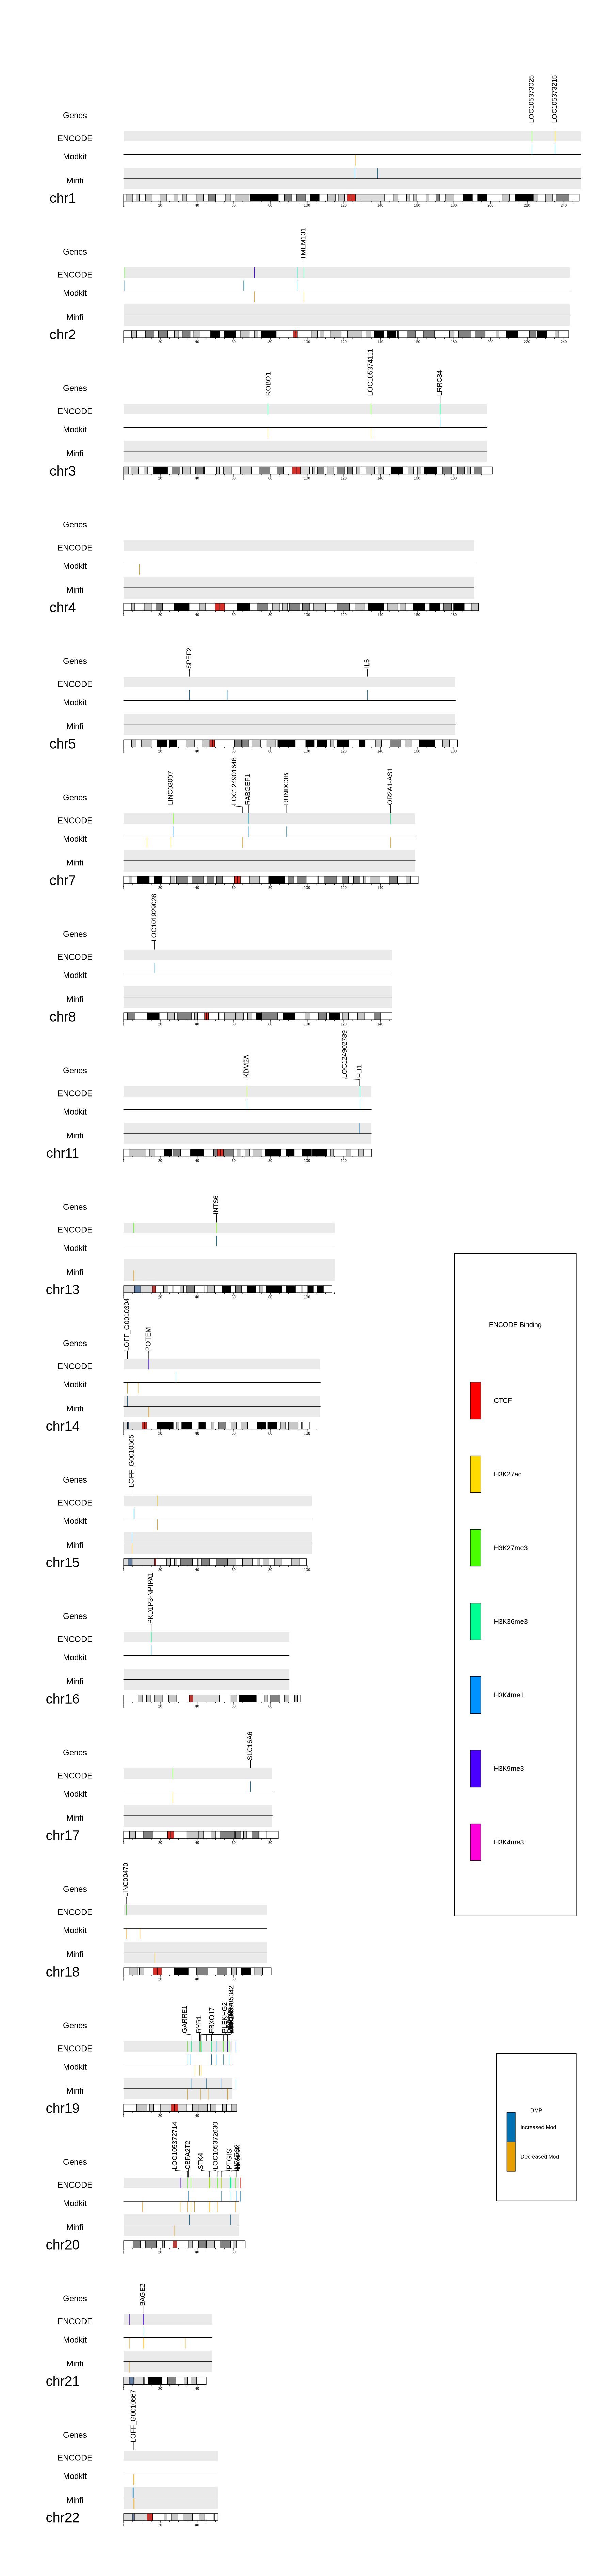

In [ ]:
# bed_files = get_encode_file_list()

# Encode colouring
new_names = names(bed_files)
new_names <- sapply(strsplit(new_names, "\\."), function(x) x[2])
new_names <- unique(new_names)
encode_colours = rainbow(length(new_names))
names(encode_colours) <- new_names

# DMP colouring
dmp_legend_names = c('Increased Mod', 'Decreased Mod')
dmp_colours = c('#0072B2', '#E69F00')
names(dmp_colours) <- dmp_legend_names

# my_genes = c()
# my_topgenes = c()
# encode_data = list()
for (name_of_test in tests_to_check) {
    # Set up variables
    vars = get_vars(name_of_test)
    bebic = vars$bebic
    modBase = vars$modBase
    motif = vars$motif
    path2_output = vars$path2_output
    modkit_score = vars$modkit_score
    minfi_score = vars$minfi_score

    # Load modkit and minfi data for the test
    modkit_DMP_name = paste0("sig_DMPs.", bebic, ".", name_of_test, ".annotated_all.modkit.csv")
    minfi_DMP_name = paste0("sig_DMPs.", bebic, ".", name_of_test, ".annotated_all.minfi.csv")
    modkit_DMP_data = fread(paste0(path2_output, modkit_DMP_name))
    minfi_DMP_data = fread(paste0(path2_output, minfi_DMP_name))

    # Get up and down DMPs
    up_DMPs_modkit = get_up_DMPs(DMP_data = modkit_DMP_data, data_source = 'modkit')
    down_DMPs_modkit = get_down_DMPs(DMP_data = modkit_DMP_data, data_source = 'modkit')
    up_DMPs_minfi = get_up_DMPs(DMP_data = minfi_DMP_data, data_source = 'minfi')
    down_DMPs_minfi = get_down_DMPs(DMP_data = minfi_DMP_data, data_source = 'minfi')

    # Filter to score - function doesn't work
    # up_topDMPs_modkit = filter_to_score(DMP_data = up_DMPs_modkit, score = modkit_score)
    # down_topDMPs_modkit = filter_to_score(DMP_data = down_DMPs_modkit, score = modkit_score)
    # up_topDMPs_minfi = filter_to_score(DMP_data = up_DMPs_minfi, score = minfi_score)
    # down_topDMPs_minfi = filter_to_score(DMP_data = down_DMPs_minfi, score = minfi_score)
    
    # Filter to score
    up_topDMPs_modkit <- up_DMPs_modkit[up_DMPs_modkit$score >= modkit_score, ]
    down_topDMPs_modkit <- down_DMPs_modkit[down_DMPs_modkit$score >= modkit_score, ]
    up_topDMPs_minfi <- up_DMPs_minfi[up_DMPs_minfi$score >= minfi_score, ]
    down_topDMPs_minfi <- down_DMPs_minfi[down_DMPs_minfi$score >= minfi_score, ]
    # Check sizes
    # printf('check sizes')
    # printf(dim(up_topDMPs_modkit))
    # printf(dim(down_topDMPs_modkit))
    # printf(dim(up_topDMPs_minfi))
    # printf(dim(down_topDMPs_minfi))
    # printf('sizes done')

    ##########################################

    # get granges object ready for plotting top scoring DMPs
    modkit_upDMP_gr = makeGRangesFromDataFrame(up_topDMPs_modkit, keep.extra.columns = TRUE)
    modkit_downDMP_gr = makeGRangesFromDataFrame(down_topDMPs_modkit, keep.extra.columns = TRUE)
    minfi_upDMP_gr = makeGRangesFromDataFrame(up_topDMPs_minfi, keep.extra.columns = TRUE)
    minfi_downDMP_gr = makeGRangesFromDataFrame(down_topDMPs_minfi, keep.extra.columns = TRUE)

    # # Filter genes down to those I've identified
    # my_genes = c(unique(modkit_DMP_data$gene_id), unique(minfi_DMP_data$gene_id))
    # my_genes = unique(my_genes)
    # # Filter genes down to those I've identified
    # my_genes_gr <- subset(genes_txdb, gene_id %in% my_genes)

    # my_topgenes = c(my_topgenes, unique(modkit_topDMP$gene_id), unique(minfi_topDMP$gene_id))
    # my_topgenes = c(unique(modkit_topDMP$gene_id), unique(minfi_topDMP$gene_id))
    # my_topgenes = unique(my_topgenes)
    # my_topgenes_gr <- subset(genes_txdb, gene_id %in% my_topgenes)

    # ##########################################
    # Plot encode data
    # Merging all encode data together, not distinguished by experiment or up/down modified
    # print(modkit_upDMP_gr)
    encode_gr1 = get_encode_data(up_topDMPs_modkit)
    encode_gr2 = get_encode_data(down_topDMPs_modkit)
    encode_gr3 = get_encode_data(up_topDMPs_minfi)
    encode_gr4 = get_encode_data(down_topDMPs_minfi)
    # convert to dt
    dt1 <- copy(as.data.table(encode_gr1))
    dt2 <- copy(as.data.table(encode_gr2))
    dt3 <- copy(as.data.table(encode_gr3))
    dt4 <- copy(as.data.table(encode_gr4))

    dt <- merge(dt1, dt2, all = TRUE)
    dt <- merge(dt, dt3, all = TRUE)
    dt <- merge(dt, dt4, all = TRUE)

    encode_gr = makeGRangesFromDataFrame(dt, keep.extra.columns = TRUE)

    # Assign colors to each region based on encode_annot
    region_colours <- encode_colours[encode_gr$bind_type]

    ##########################################
    # Get genes to plot
    # Combine all DMP data
    # combined_gr <- c(modkit_upDMP_gr, modkit_downDMP_gr, minfi_upDMP_gr, minfi_downDMP_gr)
    # reduced_gr <- reduce(combined_gr)
    my_topgenes = unique(c(unique(modkit_upDMP_gr$gene_id), unique(modkit_downDMP_gr$gene_id), unique(minfi_upDMP_gr$gene_id), unique(minfi_downDMP_gr$gene_id)))

    # my_topgenes = unique(reduced_gr$gene_id)
    # my_topgenes_gr <- subsetByOverlaps(genes_txdb, reduced_gr)
    my_topgenes_gr <- subset(genes_txdb, gene_id %in% my_topgenes)
    # print(my_topgenes_gr)

    ##########################################
    # Find out how many chromosomes
    chroms = unique(c(seqnames(modkit_upDMP_gr), seqnames(modkit_downDMP_gr), seqnames(minfi_upDMP_gr), seqnames(minfi_downDMP_gr)))
    # chroms = unique(seqnames(encode_gr))
    chroms <- order_my_chroms(chroms)
    num_chr = length(chroms)
    # printf(chroms)
    # printf(num_chr)

    rdata_fn = paste0(path2_output, 'karyoplotting_vars.', name_of_test, '.Rdata')
    save(num_chr, ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms, dmp_legend_names, dmp_colours, new_names, encode_colours, file = rdata_fn)

}


Ran the above in an Rscript, now need to sort out the plotting part

In [ ]:
# Set plot size based on chromosomes
options(repr.plot.width = 15.0, repr.plot.height = num_chr*3.5)

plot_karyoplot(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms)
legend("bottomright", legend = dmp_legend_names, fill = dmp_colours, title = "DMP", inset = c(0, 0), box.lwd = 1, box.col = "black", box.lty = 1, cex = 0.8, x.intersp = 0.5, y.intersp = 0.5, text.width = 0.1)
legend("bottomright", inset = c(0, 0.15), legend = new_names, fill = encode_colours, title = "ENCODE Binding")

In [192]:
library(ggplot2)
library(lemon)  # For reposition_legend function

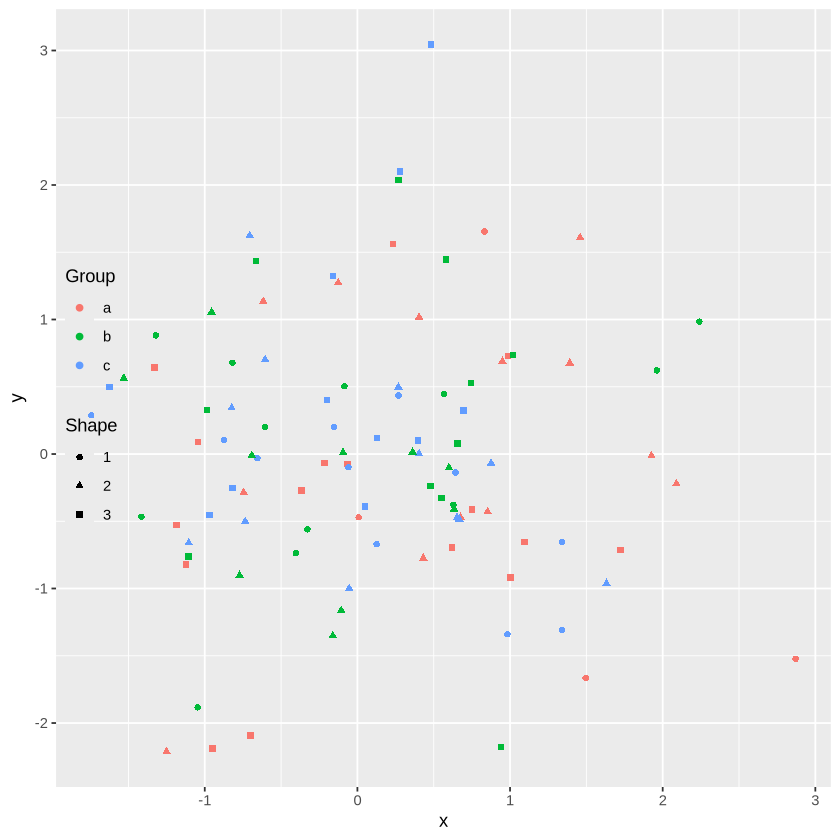

In [194]:
# Example data
df <- data.frame(
  x = rnorm(100),
  y = rnorm(100),
  group = sample(letters[1:3], 100, replace = TRUE),
  shape = sample(1:3, 100, replace = TRUE)
)

# Create a ggplot with multiple guides
p <- ggplot(df, aes(x = x, y = y, color = group, shape = factor(shape))) +
  geom_point() +
  guides(
    color = guide_legend(title = "Group"),
    shape = guide_legend(title = "Shape")
  ) +
  theme(
    legend.box.background = element_blank(),
    legend.background = element_blank()
  )

# Reposition the legend
p <- reposition_legend(p, 'left')

# Display the plot
# print(p)


In [60]:
up_DMPs_modkit
up_topDMPs_modkit
modkit_upDMP_gr

V1,seqnames,start,end,width,strand,balanced_effect_size,score,pval,name,⋯,SJCRH30.H3K4me1,SJCRH30.H3K4me3,SJCRH30.H3K9me3,SJSA1.H3K27ac,SJSA1.H3K27me3,SJSA1.H3K36me3,SJSA1.H3K4me3,SJSA1.H3K9me3,VCaP.CTCF,VCaP.H3K27ac
<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,chr1,22116,22117,2,*,-0.2252874,6.792485,0.0020594298,1.1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,chr1,10489582,10489583,2,*,-0.1772247,2.057700,0.0072206879,1.3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,chr1,16435849,16435850,2,*,-0.1186613,2.240755,0.0065448875,1.6,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,chr1,30615692,30615693,2,*,-0.2083333,3.462747,0.0032611382,1.7,⋯,peak_2076,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,chr1,32060983,32060984,2,*,-0.2244669,4.300908,0.0050967912,1.8,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,chr1,32061825,32061826,2,*,-0.1847619,3.967374,0.0031110480,1.9,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
11,chr1,32376453,32376454,2,*,-0.1908213,4.202793,0.0071611171,1.11,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
12,chr1,35650527,35650528,2,*,-0.2049383,4.054094,0.0009933751,1.12,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
13,chr1,39733937,39733938,2,*,-0.1972222,4.939126,0.0029517840,1.13,⋯,NA,NA,NA,NA,NA,peak_1403,NA,NA,NA,NA


V1,seqnames,start,end,width,strand,balanced_effect_size,score,pval,name,⋯,SJCRH30.H3K4me1,SJCRH30.H3K4me3,SJCRH30.H3K9me3,SJSA1.H3K27ac,SJSA1.H3K27me3,SJSA1.H3K36me3,SJSA1.H3K4me3,SJSA1.H3K9me3,VCaP.CTCF,VCaP.H3K27ac
<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,chr1,22116,22117,2,*,-0.2252874,6.792485,0.0020594298,1.1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,chr1,10489582,10489583,2,*,-0.1772247,2.057700,0.0072206879,1.3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,chr1,16435849,16435850,2,*,-0.1186613,2.240755,0.0065448875,1.6,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,chr1,30615692,30615693,2,*,-0.2083333,3.462747,0.0032611382,1.7,⋯,peak_2076,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,chr1,32060983,32060984,2,*,-0.2244669,4.300908,0.0050967912,1.8,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,chr1,32061825,32061826,2,*,-0.1847619,3.967374,0.0031110480,1.9,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
11,chr1,32376453,32376454,2,*,-0.1908213,4.202793,0.0071611171,1.11,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
12,chr1,35650527,35650528,2,*,-0.2049383,4.054094,0.0009933751,1.12,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
13,chr1,39733937,39733938,2,*,-0.1972222,4.939126,0.0029517840,1.13,⋯,NA,NA,NA,NA,NA,peak_1403,NA,NA,NA,NA


GRanges object with 2013 ranges and 54 metadata columns:
         seqnames              ranges strand |        V1 balanced_effect_size
            <Rle>           <IRanges>  <Rle> | <integer>            <numeric>
     [1]     chr1         22116-22117      * |         1            -0.225287
     [2]     chr1   10489582-10489583      * |         3            -0.177225
     [3]     chr1   16435849-16435850      * |         6            -0.118661
     [4]     chr1   30615692-30615693      * |         7            -0.208333
     [5]     chr1   32060983-32060984      * |         8            -0.224467
     ...      ...                 ...    ... .       ...                  ...
  [2009]     chrX 139318133-139318134      * |      3693            -0.121736
  [2010]     chrX 142245578-142245579      * |      3695            -0.313333
  [2011]     chrX 147848502-147848503      * |      3696            -0.152962
  [2012]     chrX 147848549-147848550      * |      3697            -0.232967
  [2013

In [ ]:
pp

ERROR: Error: object 'pp' not found


In [137]:
# DEBUG cell 

colname = "C4-2B.CTCF"
newname = sub("^X", "", colname)
newname
bed_file = bed_files[[newname]]
bed_file


for (colname in names(encode_data)) {
    peaks <- encode_data[[colname]]
    # strip X if it exists
    newname = sub("^X", "", colname)
    
    # print(1)
    bed_file = bed_files[[newname]]  
    # print(2)
    print(newname)
    print(bed_file)
}

[1] "C4-2B.CTCF"

[1] "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed/chm13v2.0_C4-2B.CTCF.bed"

[1] "22Rv1.CTCF"
[1] "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed/chm13v2.0_22Rv1.CTCF.bed"
[1] "22Rv1.H3K27ac"
[1] "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed/chm13v2.0_22Rv1.H3K27ac.bed"
[1] "BE2C.H3K27me3"
[1] "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed/chm13v2.0_BE2C.H3K27me3.bed"
[1] "BE2C.H3K36me3"
[1] "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed/chm13v2.0_BE2C.H3K36me3.bed"
[1] "BE2C.H3K4me1"
[1] "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed/chm13v2.0_BE2C.H3K4me1.bed"
[1] "BE2C.H3K9me3"
[1] "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed/chm13v2.0_BE2C.H3K9me3.bed"
[1] "cell.H3K27ac"
[1] "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed/chm13v2.0_brain_microvascular_endothelial_cell.H3K27ac.bed"
[1] "cell.H3K27me3"
[1] "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed/chm13v2.0_brain_microvascular_endothelial_cell.H3K27me3.bed"
[1] "cell.H3K36me3"
[1] "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed/chm13v2.0_brain_microva

In [151]:
# Function to replace all but the last dot with a hyphen
replace_dots <- function(name) {
    sub("\\.(?=[^.]*$)", "TEMP_REPLACE", name, perl = TRUE) %>%
        gsub("\\.", "-", .) %>%
        gsub("TEMP_REPLACE", ".", .)
}

names(encode_data) = sapply(names(encode_data), replace_dots)

In [ ]:
# This piece is to get the coords on the genome of each identified peak
# Initialize an empty list to store the extracted data
extracted_data <- list()
i = 0
for (colname in names(encode_data)) {
    i = i+1
    
    peaks <- encode_data[[colname]]

    # strip X if it exists
    newname = sub("^X", "", colname)
    # print(1)
    bed_file = bed_files[[newname]]  
    bed_data <- fread(bed_file)
    # print(3)
    bed_data = makeGRangesFromDataFrame(
        bed_data, keep.extra.columns = TRUE, seqnames.field = c('chrom'), start.field = c('chromStart'), end.field = c('chromEnd'), strand.field = c('strand')
    )
    # print(4)

    # Extract the "peak" information
    bed_data$peak_number <- gsub(".*_(peak_\\d+)$", "\\1", bed_data$name)
    # print(5)
    
    # Filter to relevant peaks
    filt_bed_data <- subset(bed_data, peak_number %in% peaks)
    filt_bed_data$encode_annot = newname

    # Extract the desired column and genomic locations
    extracted_gr <- filt_bed_data[, c("encode_annot")]
    # Store the extracted GRanges object in the list
    extracted_data[[i]] <- extracted_gr
    # break

}

In [ ]:
# Combine all extracted GRanges objects into one
encode_annotations <- do.call(c, extracted_data)

encode_annotations

GRanges object with 6284 ranges and 1 metadata column:
         seqnames              ranges strand | encode_annot
            <Rle>           <IRanges>  <Rle> |  <character>
     [1]     chr1 143905552-143906326      * |   22Rv1.CTCF
     [2]    chr11           3726-4704      * |   22Rv1.CTCF
     [3]    chr11   47360695-47361068      * |   22Rv1.CTCF
     [4]    chr11 128892100-128892947      * |   22Rv1.CTCF
     [5]    chr11 130027692-130029012      * |   22Rv1.CTCF
     ...      ...                 ...    ... .          ...
  [6280]     chr8   41851050-41853650      * | VCaP.H3K27ac
  [6281]     chr8 117941990-117944831      * | VCaP.H3K27ac
  [6282]     chr8 141488405-141490634      * | VCaP.H3K27ac
  [6283]     chrX   15320433-15322228      * | VCaP.H3K27ac
  [6284]     chrX   44915267-44917499      * | VCaP.H3K27ac
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

In [29]:
colnames(modkit_DMP_data)
length(unique(modkit_DMP_data$gene_id))
length(unique(modkit_DMP_data$EntrezID))
dim(modkit_DMP_data)
head(modkit_DMP_data)

[1] "V1"                   "seqnames"             "start"               
 [4] "end"                  "width"                "strand"              
 [7] "balanced_effect_size" "score"                "pval"                
[10] "name"                 "also_in_other"        "gene_id"             
[13] "gene_id_strand"       "gene_description"     "EntrezID"            
[16] "X22Rv1.CTCF"          "X22Rv1.H3K27ac"       "BE2C.H3K27me3"       
[19] "BE2C.H3K36me3"        "BE2C.H3K4me1"         "BE2C.H3K9me3"        
[22] "cell.H3K27ac"         "cell.H3K27me3"        "cell.H3K36me3"       
[25] "C4.2B.CTCF"           "C4.2B.H3K27ac"        "Caco.2.H3K4me1"      
[28] "Caco.2.H3K9me3"       "male.CTCF"            "male.H3K27ac"        
[31] "HAP.1.H3K27ac"        "HAP.1.H3K27me3"       "HAP.1.H3K36me3"      
[34] "HAP.1.H3K4me1"        "HAP.1.H3K4me3"        "HAP.1.H3K9me3"       
[37] "HL.60.H3K27ac"        "MG63.H3K27me3"        "MG63.H3K36me3"       
[40] "MG63.H3K4me3"         "MG63.H3K9me3"         "RWPE1.CTCF"          
[43] "RWPE1.H3K27ac"        "RWPE2.CTCF"           "RWPE2.H3K27ac"       
[46] "RWPE2.H3K36me3"       "SJCRH30.H3K27ac"      "SJCRH30.H3K27me3"    
[49] "SJCRH30.H3K36me3"     "SJCRH30.H3K4me1"      "SJCRH30.H3K4me3"     
[52] "SJCRH30.H3K9me3"      "SJSA1.H3K27ac"        "SJSA1.H3K27me3"      
[55] "SJSA1.H3K36me3"       "SJSA1.H3K4me3"        "SJSA1.H3K9me3"       
[58] "VCaP.CTCF"            "VCaP.H3K27ac"

[1] 1318

[1] 1277

[1] 3699   59

V1,seqnames,start,end,width,strand,balanced_effect_size,score,pval,name,⋯,SJCRH30.H3K4me1,SJCRH30.H3K4me3,SJCRH30.H3K9me3,SJSA1.H3K27ac,SJSA1.H3K27me3,SJSA1.H3K36me3,SJSA1.H3K4me3,SJSA1.H3K9me3,VCaP.CTCF,VCaP.H3K27ac
<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,chr1,22116,22117,2,*,-0.2252874,6.792485,0.002059430,1.1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,chr1,10465965,10465966,2,*,0.2266029,4.158314,0.008515750,1.2,⋯,NA,NA,NA,NA,peak_266,NA,NA,NA,NA,NA
3,chr1,10489582,10489583,2,*,-0.1772247,2.057700,0.007220688,1.3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,chr1,16053186,16053187,2,*,0.2203065,5.606047,0.002022038,1.4,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,chr1,16285891,16285892,2,*,0.1086729,3.332276,0.009697220,1.5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,chr1,16435849,16435850,2,*,-0.1186613,2.240755,0.006544888,1.6,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [154]:
# Filter genes down to those I've identified
my_genes_gr <- subset(genes_txdb, gene_id %in% my_genes)
my_genes_gr

GRanges object with 1317 ranges and 1 metadata column:
          seqnames            ranges strand |     gene_id
             <Rle>         <IRanges>  <Rle> | <character>
     AAR2    chr20 37957177-37977632      + |        AAR2
   ABCA13     chr7 48333668-48808476      + |      ABCA13
    ABCB4     chr7 88615509-88725797      - |       ABCB4
    ABCB5     chr7 20750588-20892996      + |       ABCB5
   ABCC13    chr21 12616526-12644116      + |      ABCC13
      ...      ...               ...    ... .         ...
   ZNF841    chr19 55145315-55182977      - |      ZNF841
    ZNRF2     chr7 30422290-30505386      + |       ZNRF2
  ZSCAN22    chr19 61423408-61438747      + |     ZSCAN22
   ZSCAN4    chr19 60748405-60776081      + |      ZSCAN4
  ZSCAN5A    chr19 59320082-59462670      - |     ZSCAN5A
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [155]:
my_topgenes_gr <- subset(genes_txdb, gene_id %in% my_topgenes)
my_topgenes_gr

GRanges object with 36 ranges and 1 metadata column:
          seqnames              ranges strand |     gene_id
             <Rle>           <IRanges>  <Rle> | <character>
    BAGE2    chr21   10608496-10714080      - |       BAGE2
  CBFA2T2    chr20   35216640-35376563      + |     CBFA2T2
     FLI1    chr11 128718579-128845984      + |        FLI1
   IGLON5    chr19   54399928-54419173      + |      IGLON5
      IL5     chr5 133061254-133076618      - |         IL5
      ...      ...                 ...    ... .         ...
    SPEF2     chr5   35864856-36063018      + |       SPEF2
     STK4    chr20   46702402-46815925      + |        STK4
    SYCP2    chr20   61647855-61717909      - |       SYCP2
   TFAP2C    chr20   58406836-58416813      + |      TFAP2C
  TMEM131     chr2   98214553-98454161      - |     TMEM131
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [17]:
genes.data <- makeGenesDataFromTxDb(annotations_T2T,
                                    karyoplot=kplot,
                                    plot.transcripts = FALSE, 
                                    plot.transcripts.structure = FALSE)

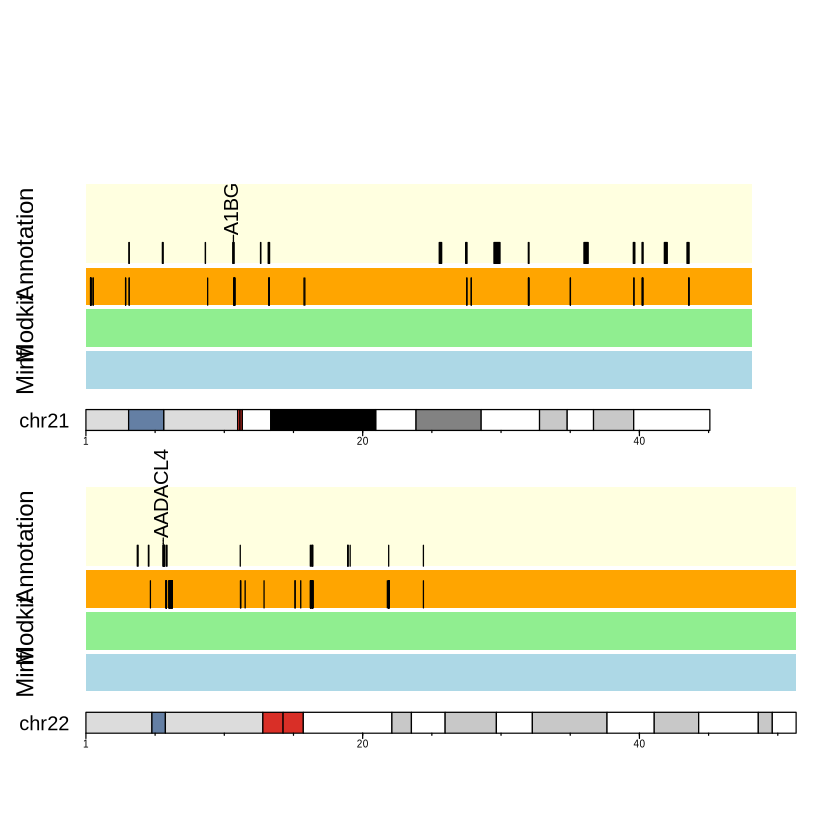

In [ ]:
pp <- getDefaultPlotParams(plot.type = 1)
pp$ideogramhei  ght <- 20
pp$data1outmargin = 50

kplot <- plotKaryotype(
    cytobands = ideogram_gr, plot.type = 1, plot.params = pp,
    chromosomes = c("chr21", "chr22")  #, cex = 2, labels.plotter = NULL
)
# kpAddChromosomeNames(kplot, xoffset = -0.03, cex = 1.5)
kpAddBaseNumbers(kplot)

minfi_track = autotrack(current.track = 1, total.tracks = 5, margin = 0.1)
kpAddLabels(kplot, labels = "Minfi", pos = 1, label.margin = 0.08, srt = 90, cex = 1.2, r0 = minfi_track$r0, r1 = minfi_track$r1)
kpDataBackground(kplot, r0 = minfi_track$r0, r1 = minfi_track$r1, color = "lightblue")

modkit_track = autotrack(current.track = 2, total.tracks = 5, margin = 0.1)
kpAddLabels(kplot, labels = "Modkit", pos=1, label.margin = 0.08, srt=90, cex = 1.2, r0=modkit_track$r0, r1=modkit_track$r1)
kpDataBackground(kplot, r0 = modkit_track$r0, r1 = modkit_track$r1, color = "lightgreen")

encode_track = autotrack(current.track = 3, total.tracks = 5, margin = 0.1)
kpDataBackground(kplot, r0 = encode_track$r0, r1 = encode_track$r1, color = "orange")
kpPlotRegions(kplot, data=combined_gr, r0 = encode_track$r0, r1 = encode_track$r1-0.05, avoid.overlapping = FALSE)

gene_track = autotrack(current.track = 4, total.tracks = 5, margin = 0.1)
gene_track_full = autotrack(current.track = c(4,5), total.tracks = 5, margin = 0.1)

kpAddLabels(kplot, labels = "Annotation", pos=1, label.margin = 0.08, srt=90, cex = 1.2, r0=encode_track$r0, r1=gene_track_full$r1)
kpDataBackground(kplot, r0 = gene_track_full$r0, r1 = gene_track_full$r1, color = "lightyellow")

# print(gene_track$r0)
# print(gene_track$r1)
# print(gene_track_full$r1)

kpPlotRegions(kplot, data=my_genes_gr, r0 = gene_track$r0, r1 = gene_track$r1-0.08, avoid.overlapping = FALSE)
kpPlotMarkers(kplot, data=my_topgenes_gr, labels=genes_txdb$gene_id, r0 = gene_track$r0, r1 = gene_track$r1)



## Plot for each test separately using the saved data from script
karyoplotting_bebics_prep.R

In [1]:
library("karyoploteR")

# Function to plot karyoplot
plot_karyoplot_for_BEBIC_test <- function(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms, zoom.region = GRanges()) {

    pp <- getDefaultPlotParams(plot.type = 1)
    pp$ideogramheight <- 15
    pp$data1inmargin = 10
    pp$data1outmargin = 60
    pp$leftmargin = 0.2

    if (isEmpty(zoom.region)) {
        kplot <- plotKaryotype(
            cytobands = ideogram_gr, plot.type = 1, plot.params = pp,
            chromosomes = chroms, cex = 2)#, labels.plotter = NULL
    } else {
        kplot <- plotKaryotype(
            cytobands = ideogram_gr, plot.type = 1, plot.params = pp,
            chromosomes = chroms, cex = 2, zoom = zoom.region)#, labels.plotter = NULL
    }

    kpAddBaseNumbers(kplot)

    # Set tracks
    minfi_track = autotrack(current.track = 1, total.tracks = 4, margin = 0.1)
    minfi_down_track = autotrack(current.track = 1, total.tracks = 2, r0=minfi_track$r0, r1=minfi_track$r1)
    minfi_up_track = autotrack(current.track = 2, total.tracks = 2, r0=minfi_track$r0, r1=minfi_track$r1)
    modkit_track = autotrack(current.track = 2, total.tracks = 4, margin = 0.1)
    modkit_down_track = autotrack(current.track = 1, total.tracks = 2, r0=modkit_track$r0, r1=modkit_track$r1)
    modkit_up_track = autotrack(current.track = 2, total.tracks = 2, r0=modkit_track$r0, r1=modkit_track$r1)
    # adjust encode for size based on what dmp tracks do
    encode_track = autotrack(current.track = 3, total.tracks = 4, margin = 0.1)
    encode_actual_track = autotrack(current.track = 1, total.tracks = 2, r0=encode_track$r0, r1=encode_track$r1)
    encode_bottomgene_track = autotrack(current.track = 2, total.tracks = 2, r0=encode_track$r0, r1=encode_track$r1)  # gets the value for the bottom of the gene track relative to other tracks
    gene_track = autotrack(current.track = 4, total.tracks = 4, margin = 0.1)

    # Backgrounds
    kpDataBackground(kplot, r0 = minfi_track$r0, r1 = minfi_track$r1, color = "#eaeaea")
    kpDataBackground(kplot, r0 = encode_track$r0, r1 = encode_actual_track$r1, color = "#eaeaea")

    # Labels
    kpAddLabels(kplot, labels = "Minfi", pos = 1, label.margin = 0.08, srt = 0, cex = 1.2, r0 = minfi_track$r0, r1 = minfi_track$r1)
    kpAddLabels(kplot, labels = "Modkit", pos=1, label.margin = 0.08, srt=0, cex = 1.2, r0=modkit_track$r0, r1=modkit_track$r1)
    kpAddLabels(kplot, labels = "ENCODE", pos=1, label.margin = 0.08, srt=0, cex = 1.2, r0=encode_actual_track$r0, r1=encode_actual_track$r1)
    kpAddLabels(kplot, labels = "Genes", pos=1, label.margin = 0.08, srt=0, cex = 1.2, r0=encode_bottomgene_track$r0, r1=gene_track$r1)
    
    # Plot Minfi DMP track

    kpPlotRegions(kplot, data=minfi_upDMP_gr, r0 = minfi_up_track$r0, r1 = minfi_up_track$r1, avoid.overlapping = FALSE, col = '#0072B2')
    kpPlotRegions(kplot, data=minfi_downDMP_gr, r0 = minfi_down_track$r1, r1 = minfi_down_track$r0, avoid.overlapping = FALSE, col = '#E69F00')
    kpAbline(kplot, h=0, r0 = minfi_up_track$r0, r1 = minfi_up_track$r1)

    # Plot Modkit DMP track
    kpPlotRegions(kplot, data=modkit_upDMP_gr, r0 = modkit_up_track$r0, r1 = modkit_up_track$r1, avoid.overlapping = FALSE, col = '#0072B2')
    kpPlotRegions(kplot, data=modkit_downDMP_gr, r0 = modkit_down_track$r1, r1 = modkit_down_track$r0, avoid.overlapping = FALSE, col = '#E69F00')
    kpAbline(kplot, h=0, r0 = modkit_up_track$r0, r1 = modkit_up_track$r1)

    # Plot ENCODE
    kpPlotRegions(kplot, data=encode_gr, r0 = encode_track$r0, r1 = encode_actual_track$r1, avoid.overlapping = FALSE, col = region_colours)  # r1 = encode_track$r1-0.05

    # Plot Genes
    kpPlotMarkers(kplot, data=my_topgenes_gr, labels=my_topgenes_gr$gene_id, r0 = encode_bottomgene_track$r0, r1 = encode_bottomgene_track$r1)
}

Loading required package: regioneR

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Load

### Plot legends

In [2]:
name_of_test = 'test2'  # use test2 doesn't matter they are all the same
path2_output = paste0("/home/dejlu879/20240731-BEBIC_dmr/pipeline_", name_of_test, "/output_data/")
rdata_fn = paste0(path2_output, 'karyoplotting_vars.', name_of_test, '.Rdata')
load(file = rdata_fn)

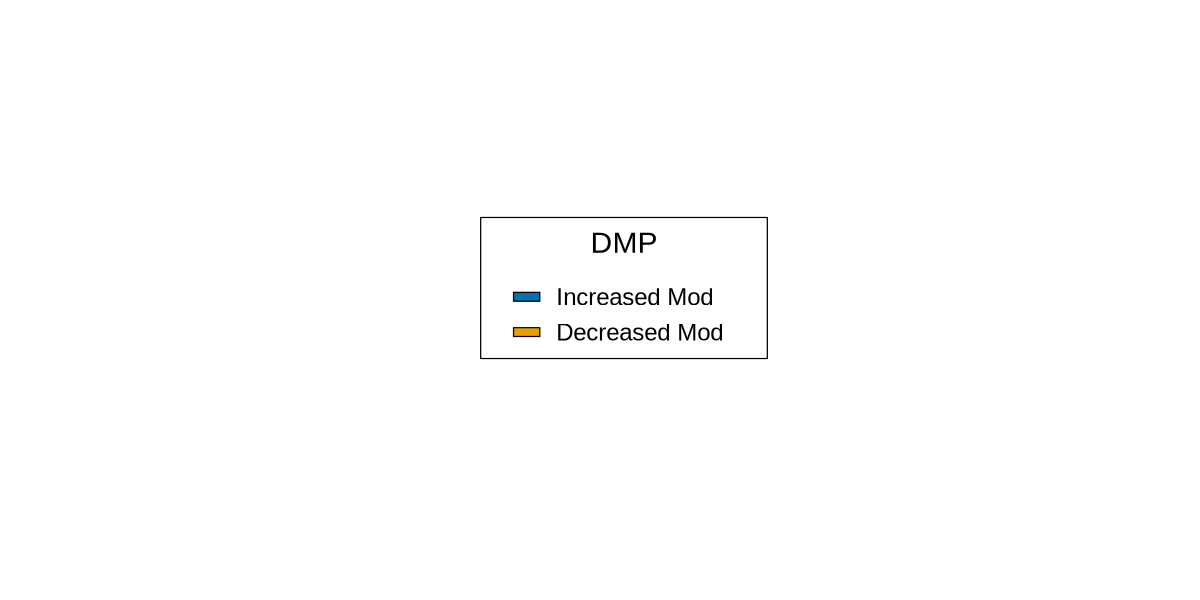

In [3]:
options(repr.plot.width = 10, repr.plot.height = 5)
plot.new()
legend("center", legend = dmp_legend_names, fill = dmp_colours, title = "\nDMP", box.lwd = 1, box.col = "black", box.lty = 1, cex = 1.2, x.intersp = 0.5, y.intersp = 2, text.width = 0.2, title.cex = 1.5)

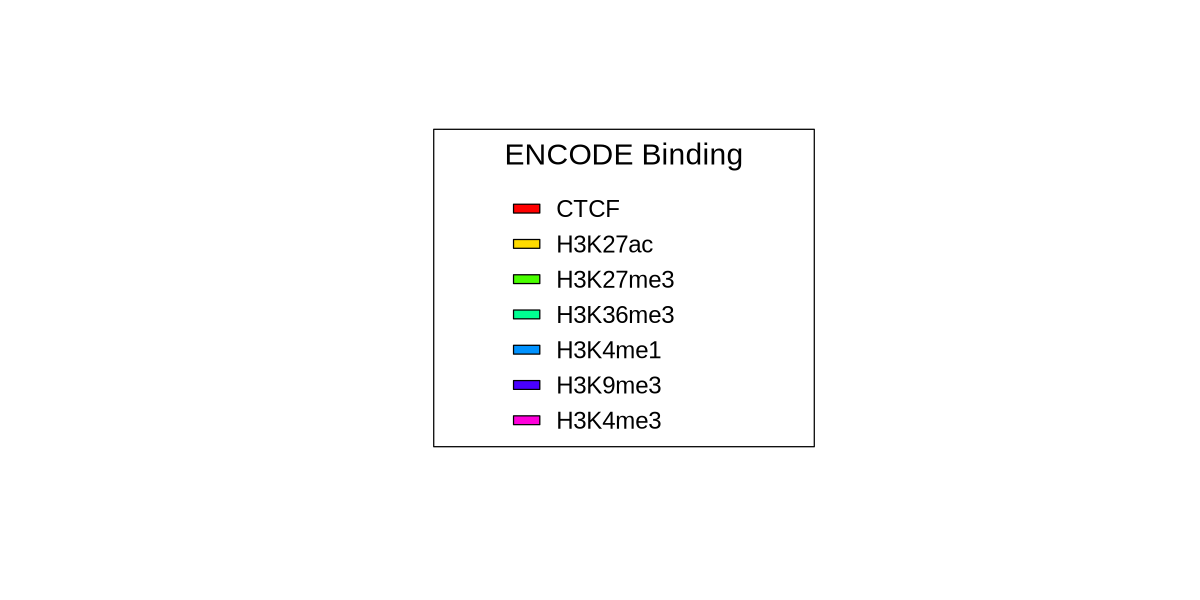

In [4]:
options(repr.plot.width = 10, repr.plot.height = 5)
plot.new()
legend("center", legend = new_names, fill = encode_colours, title = "\nENCODE Binding", box.lwd = 1, box.col = "black", box.lty = 1, cex = 1.2, x.intersp = 0.5, y.intersp = 2, text.width = 0.2, title.cex = 1.5)

### Test 2

In [1]:
name_of_test = 'test2'

In [3]:
path2_output = paste0("/home/dejlu879/20240731-BEBIC_dmr/pipeline_", name_of_test, "/output_data/")
rdata_fn = paste0(path2_output, 'karyoplotting_vars.', name_of_test, '.Rdata')
load(file = rdata_fn)


In [18]:
ls()

[1] "chroms"                        "dmp_colours"                  
 [3] "dmp_legend_names"              "encode_colours"               
 [5] "encode_gr"                     "gene_list"                    
 [7] "genes_txdb"                    "ideogram_gr"                  
 [9] "LINC_genes"                    "LOC_genes"                    
[11] "LOFF_genes"                    "minfi_downDMP_gr"             
[13] "minfi_upDMP_gr"                "modkit_downDMP_gr"            
[15] "modkit_upDMP_gr"               "my_topgenes_gr"               
[17] "name_of_test"                  "named_genes"                  
[19] "new_names"                     "num_chr"                      
[21] "path2_output"                  "plot_karyoplot_for_BEBIC_test"
[23] "rdata_fn"                      "region_colours"

In [28]:
# Print data to talk about

gene_list = my_topgenes_gr$gene_id
LOC_genes = gene_list[grepl("^LOC", gene_list)]
named_genes = gene_list[!grepl("^LOC", gene_list)]
LOFF_genes = named_genes[grepl("^LOFF", named_genes)]
named_genes = named_genes[!grepl("^LOFF", named_genes)]
LINC_genes = named_genes[grepl("^LINC", named_genes)]
named_genes = named_genes[!grepl("^LINC", named_genes)]


encode_list = encode_gr$bind_type
CTCF_binding = encode_list[grepl("CTCF", encode_list)]
H3K27ac_binding = encode_list[grepl("H3K27ac", encode_list)]
H3K27me3_binding = encode_list[grepl("H3K27me3", encode_list)]
H3K36me3_binding = encode_list[grepl("H3K36me3", encode_list)]
H3K4me1_binding = encode_list[grepl("H3K4me1", encode_list)]
H3K9me3_binding = encode_list[grepl("H3K9me3", encode_list)]
H3K4me3_binding = encode_list[grepl("H3K4me3", encode_list)]

print('------------')
print("Number of all genes")
print(length(gene_list))
print("Number of LOC genes")
print(length(LOC_genes))
print("Number of LOFF genes")
print(length(LOFF_genes))
print("Number of LINC genes")
print(length(LINC_genes))
print("Number of named genes")
print(length(named_genes))
print("Number of all binding sites")
print(length(encode_list))
print("Number of CTCF binding sites")
print(length(CTCF_binding))
print("Number of H3K27ac binding sites")
print(length(H3K27ac_binding))
print("Number of H3K27me3 binding sites")
print(length(H3K27me3_binding))
print("Number of H3K36me3 binding sites")
print(length(H3K36me3_binding))
print("Number of H3K4me1 binding sites")
print(length(H3K4me1_binding))
print("Number of H3K9me3 binding sites")
print(length(H3K9me3_binding))
print("Number of H3K4me3 binding sites")
print(length(H3K4me3_binding))


[1] "------------"
[1] "Number of all genes"
[1] 44
[1] "Number of LOC genes"
[1] 9
[1] "Number of LOFF genes"
[1] 3
[1] "Number of LINC genes"
[1] 2
[1] "Number of named genes"
[1] 30
[1] "Number of all binding sites"
[1] 140
[1] "Number of CTCF binding sites"
[1] 1
[1] "Number of H3K27ac binding sites"
[1] 24
[1] "Number of H3K27me3 binding sites"
[1] 27
[1] "Number of H3K36me3 binding sites"
[1] 57
[1] "Number of H3K4me1 binding sites"
[1] 7
[1] "Number of H3K9me3 binding sites"
[1] 20
[1] "Number of H3K4me3 binding sites"
[1] 4


In [ ]:
Number of LOC genes
9
Number of LOFF genes
3
Number of LINC genes
2
Number of named genes
30
Number of CTCF binding sites
1
Number of H3K27ac binding sites
24
Number of H3K27me3 binding sites
27
Number of H3K36me3 binding sites
57
Number of H3K4me1 binding sites
7
Number of H3K9me3 binding sites
20
Number of H3K4me3 binding sites
4

In [30]:
LOFF_genes

[1] "LOFF_G0010304" "LOFF_G0010565" "LOFF_G0010867"

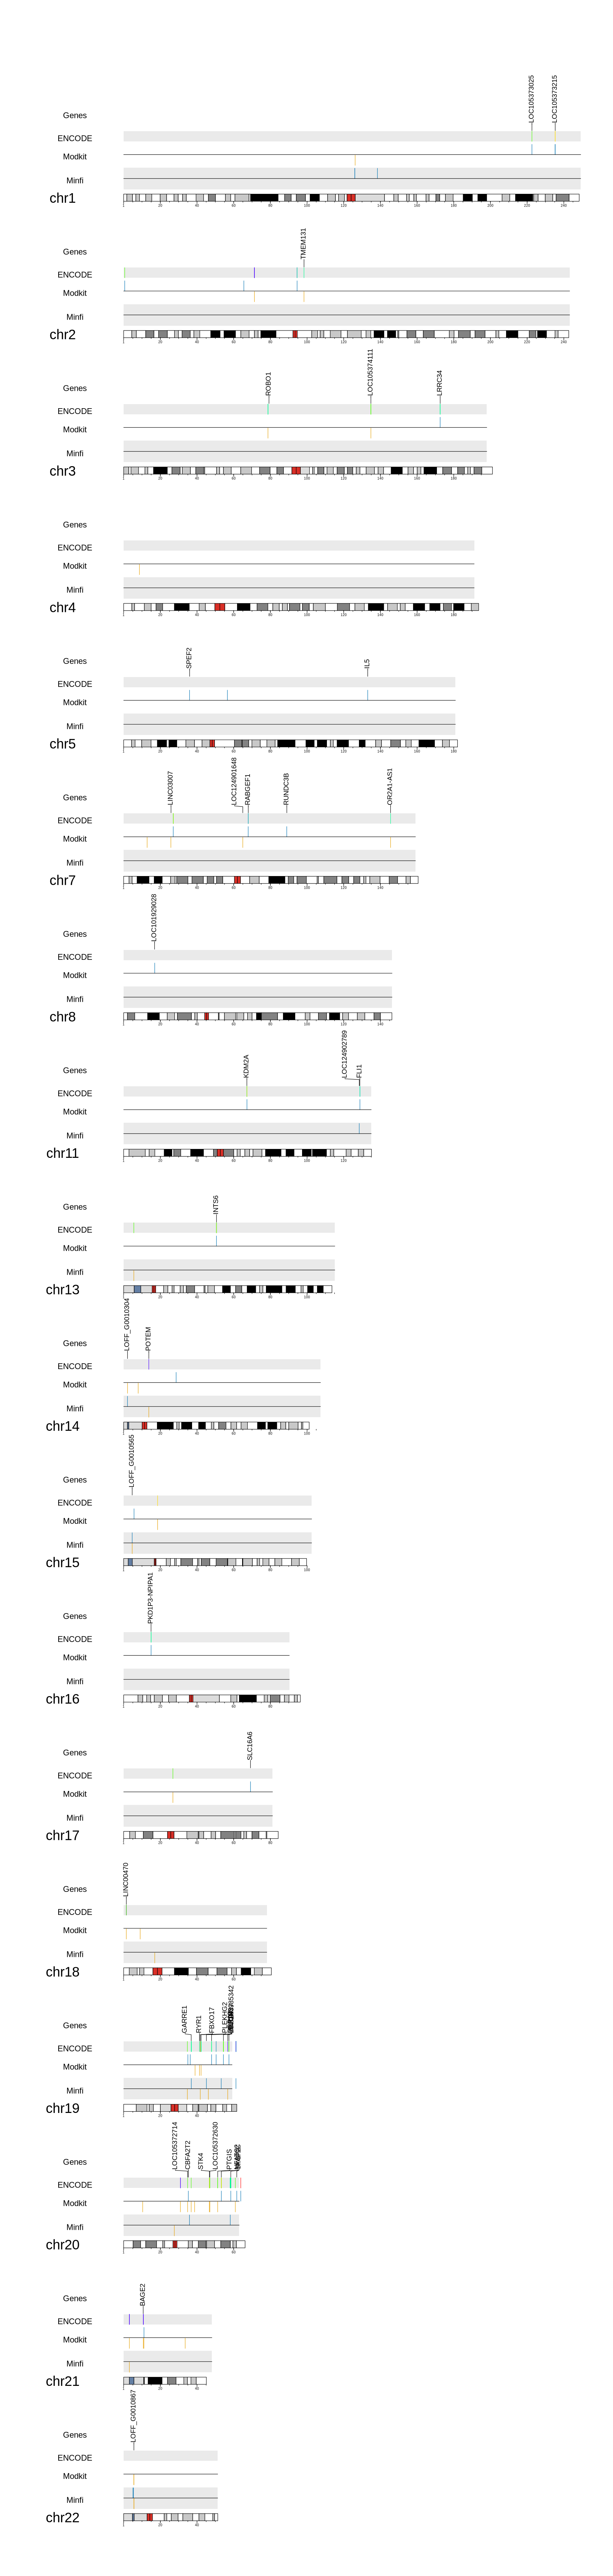

In [20]:
# Set plot size based on chromosomes
options(repr.plot.width = 15.0, repr.plot.height = num_chr*3.5)

plot_karyoplot_for_BEBIC_test(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms)

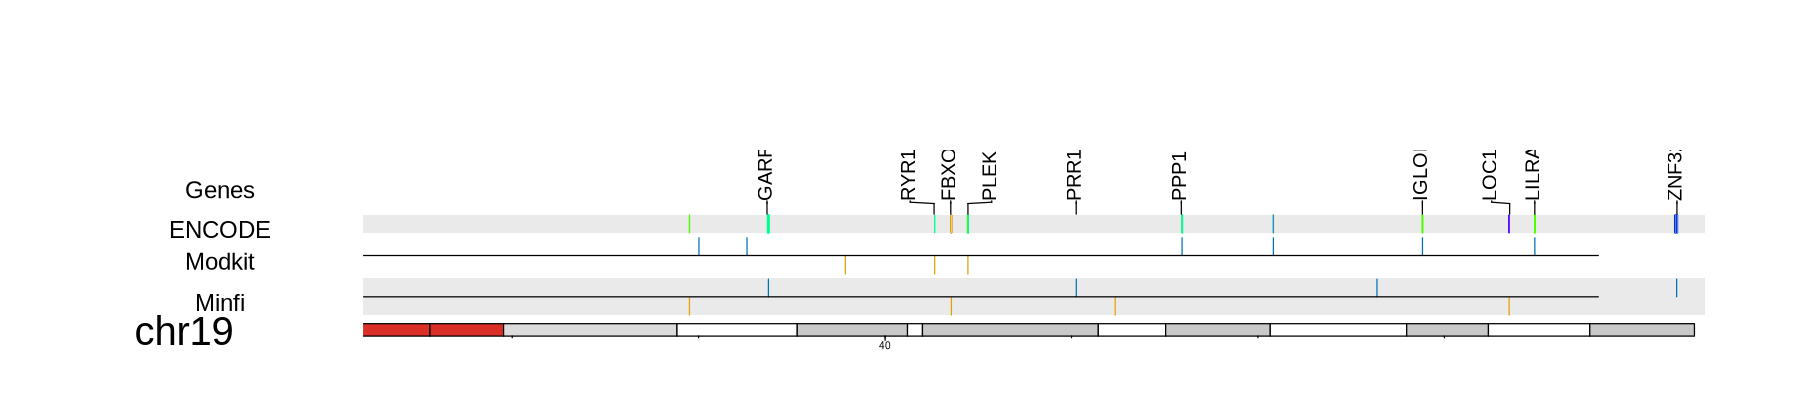

In [8]:
# Set plot size based on chromosomes
zoom.region <- toGRanges(data.frame("chr19", 26e6, 62e6))
chroms <- c("chr19")
num_chr <- 1
options(repr.plot.width = 15.0, repr.plot.height = num_chr*3.5)

plot_karyoplot_for_BEBIC_test(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_annotations, region_colours, my_topgenes_gr, genes_txdb, chroms, zoom.region)


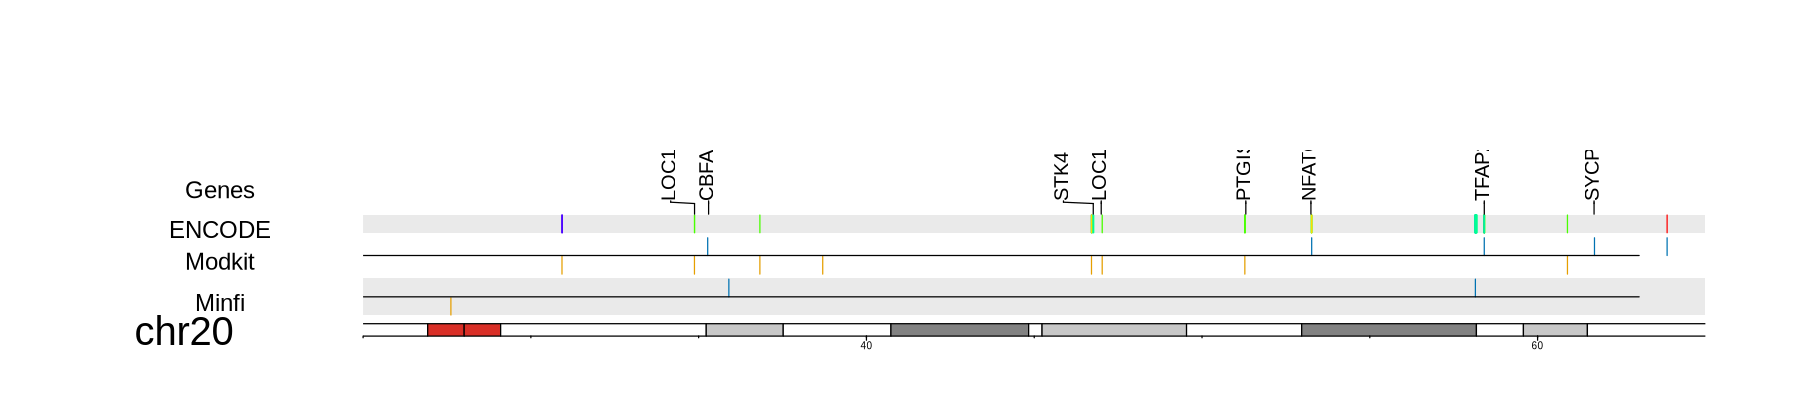

In [9]:
# Set plot size based on chromosomes
zoom.region <- toGRanges(data.frame("chr20", 25e6, 65e6))
chroms <- c("chr20")
num_chr <- 1
options(repr.plot.width = 15.0, repr.plot.height = num_chr*3.5)

plot_karyoplot_for_BEBIC_test(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_annotations, region_colours, my_topgenes_gr, genes_txdb, chroms, zoom.region)


### Test 4

In [22]:
name_of_test = 'test4'
path2_output = paste0("/home/dejlu879/20240731-BEBIC_dmr/pipeline_", name_of_test, "/output_data/")
rdata_fn = paste0(path2_output, 'karyoplotting_vars.', name_of_test, '.Rdata')
load(file = rdata_fn)


In [23]:
# Print data to talk about

gene_list = my_topgenes_gr$gene_id
LOC_genes = gene_list[grepl("^LOC", gene_list)]
named_genes = gene_list[!grepl("^LOC", gene_list)]
LOFF_genes = named_genes[grepl("^LOFF", named_genes)]
named_genes = named_genes[!grepl("^LOFF", named_genes)]
LINC_genes = named_genes[grepl("^LINC", named_genes)]
named_genes = named_genes[!grepl("^LINC", named_genes)]


encode_list = encode_gr$bind_type
CTCF_binding = encode_list[grepl("CTCF", encode_list)]
H3K27ac_binding = encode_list[grepl("H3K27ac", encode_list)]
H3K27me3_binding = encode_list[grepl("H3K27me3", encode_list)]
H3K36me3_binding = encode_list[grepl("H3K36me3", encode_list)]
H3K4me1_binding = encode_list[grepl("H3K4me1", encode_list)]
H3K9me3_binding = encode_list[grepl("H3K9me3", encode_list)]
H3K4me3_binding = encode_list[grepl("H3K4me3", encode_list)]

print('------------')
print("Number of all genes")
print(length(gene_list))
print("Number of LOC genes")
print(length(LOC_genes))
print("Number of LOFF genes")
print(length(LOFF_genes))
print("Number of LINC genes")
print(length(LINC_genes))
print("Number of named genes")
print(length(named_genes))
print("Number of all binding sites")
print(length(encode_list))
print("Number of CTCF binding sites")
print(length(CTCF_binding))
print("Number of H3K27ac binding sites")
print(length(H3K27ac_binding))
print("Number of H3K27me3 binding sites")
print(length(H3K27me3_binding))
print("Number of H3K36me3 binding sites")
print(length(H3K36me3_binding))
print("Number of H3K4me1 binding sites")
print(length(H3K4me1_binding))
print("Number of H3K9me3 binding sites")
print(length(H3K9me3_binding))
print("Number of H3K4me3 binding sites")
print(length(H3K4me3_binding))


[1] "------------"
[1] "Number of all genes"
[1] 3
[1] "Number of LOC genes"
[1] 0
[1] "Number of LOFF genes"
[1] 3
[1] "Number of LINC genes"
[1] 0
[1] "Number of named genes"
[1] 0
[1] "Number of all binding sites"
[1] 4
[1] "Number of CTCF binding sites"
[1] 1
[1] "Number of H3K27ac binding sites"
[1] 1
[1] "Number of H3K27me3 binding sites"
[1] 0
[1] "Number of H3K36me3 binding sites"
[1] 0
[1] "Number of H3K4me1 binding sites"
[1] 0
[1] "Number of H3K9me3 binding sites"
[1] 2
[1] "Number of H3K4me3 binding sites"
[1] 0


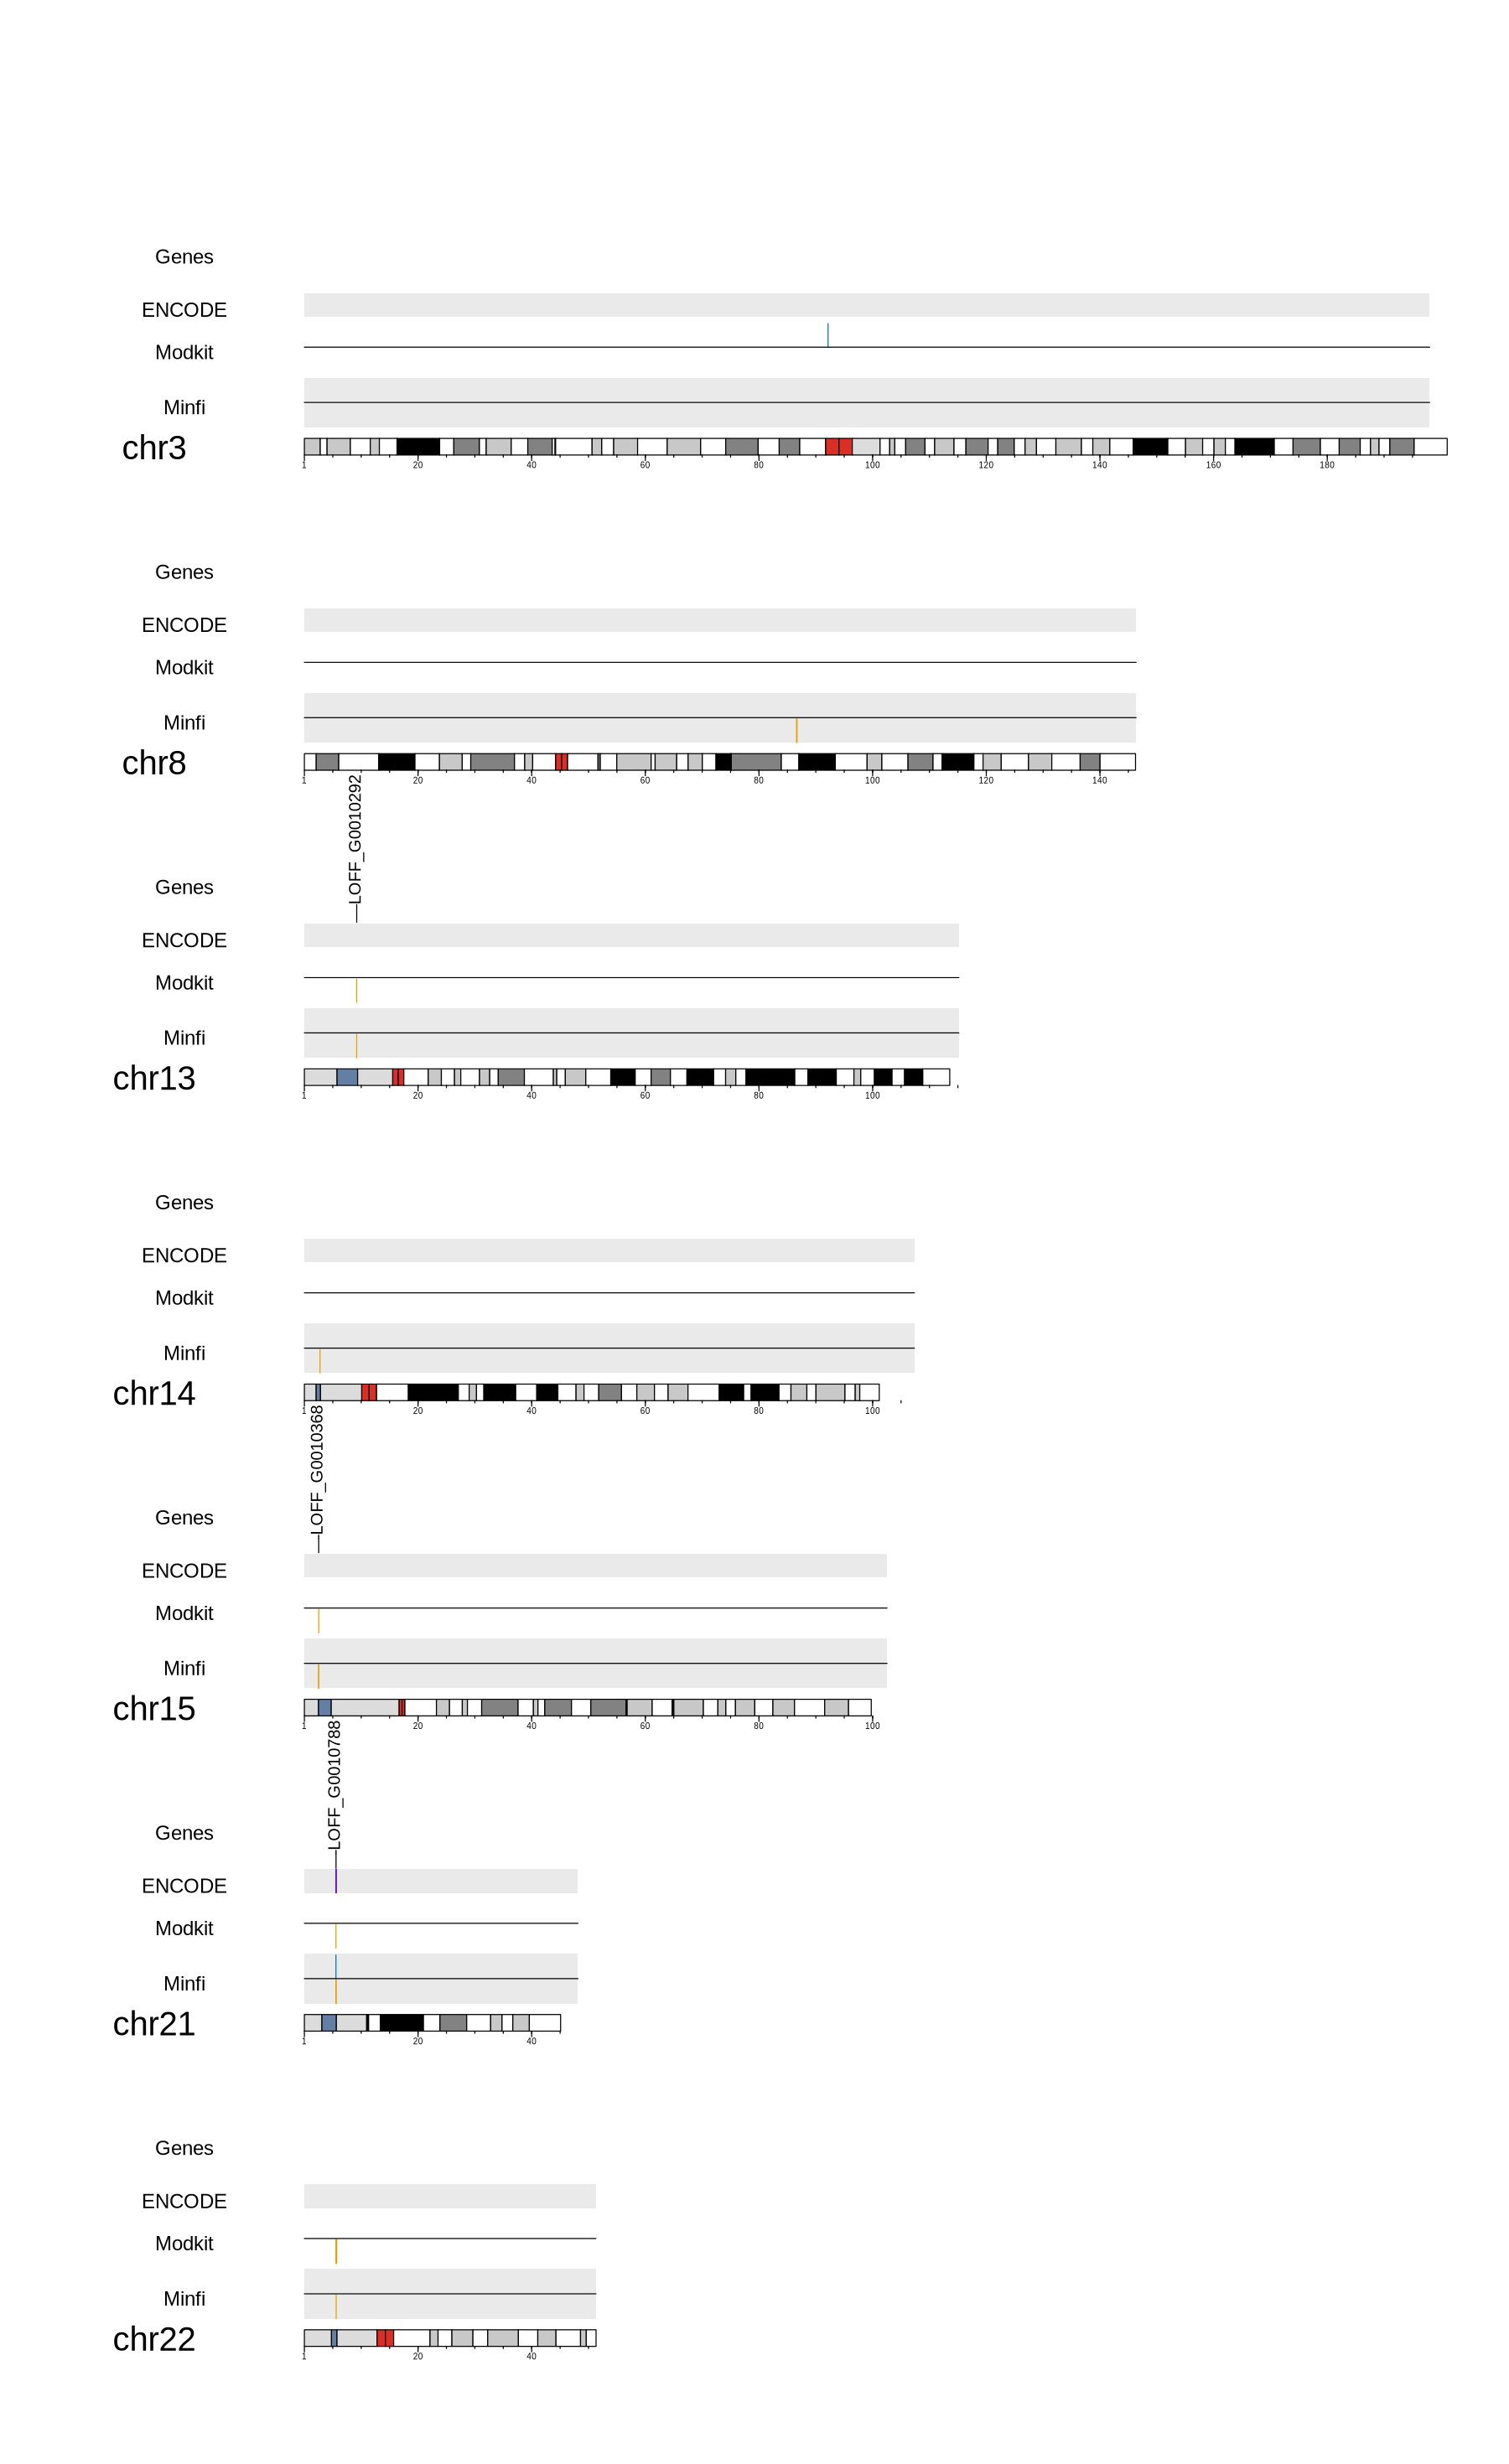

In [40]:

# Set plot size based on chromosomes
options(repr.plot.width = 15.0, repr.plot.height = num_chr*3.5)

plot_karyoplot_for_BEBIC_test(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms)


### Test 6

In [24]:
name_of_test = 'test6'

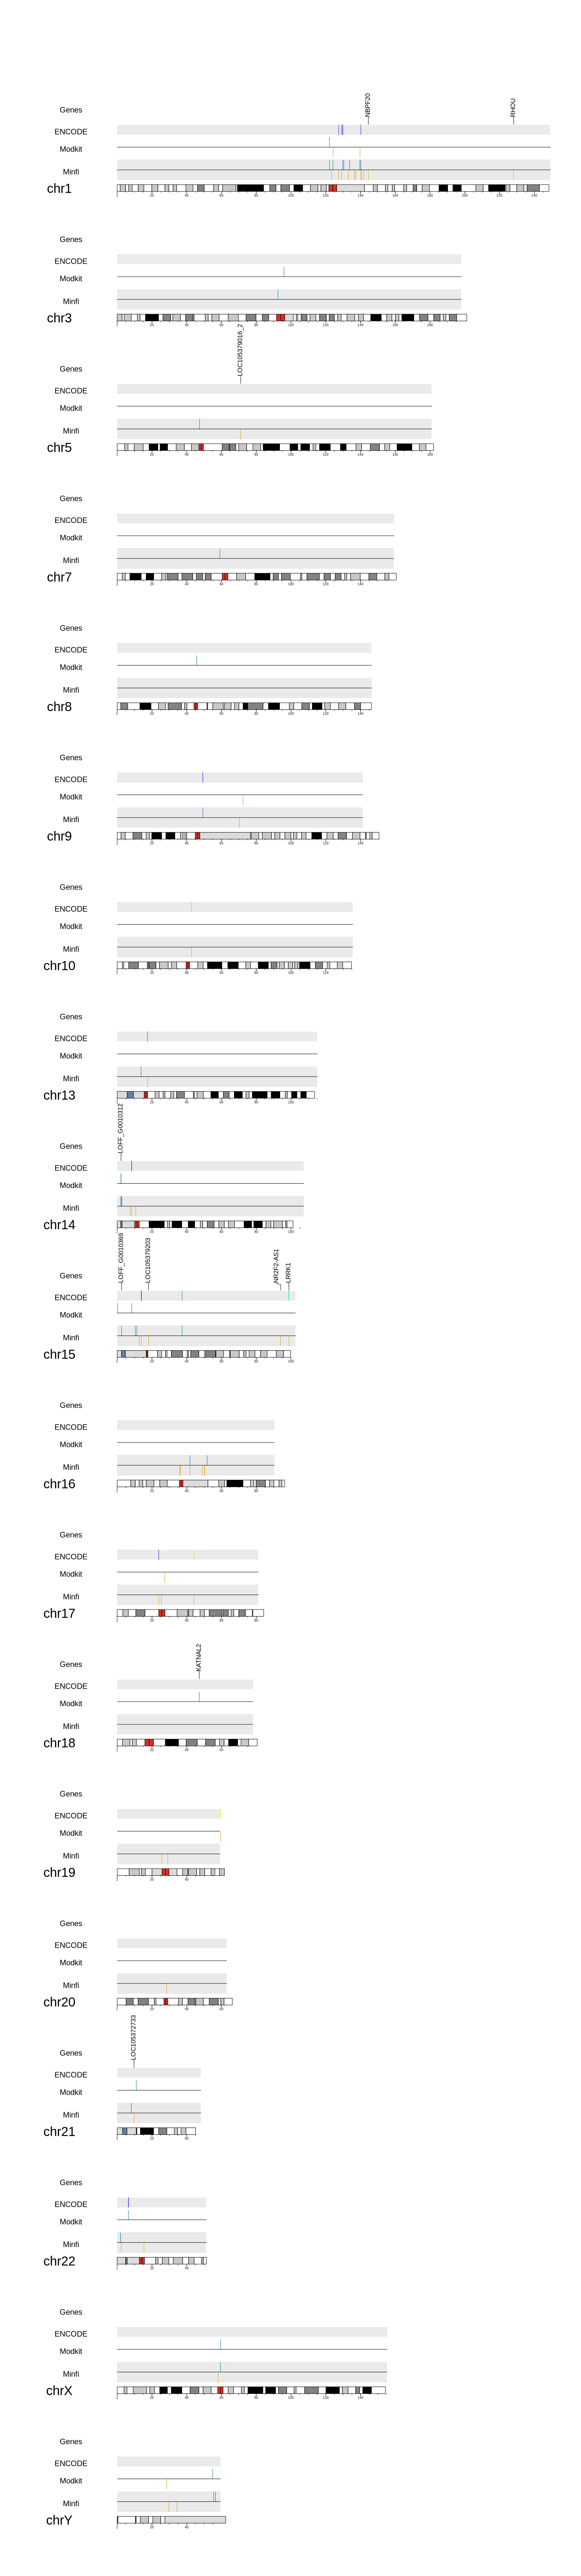

In [25]:
path2_output = paste0("/home/dejlu879/20240731-BEBIC_dmr/pipeline_", name_of_test, "/output_data/")
rdata_fn = paste0(path2_output, 'karyoplotting_vars.', name_of_test, '.Rdata')
load(file = rdata_fn)

# Set plot size based on chromosomes
options(repr.plot.width = 15.0, repr.plot.height = num_chr*3.5)

plot_karyoplot_for_BEBIC_test(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms)


In [26]:
# Print data to talk about

gene_list = my_topgenes_gr$gene_id
LOC_genes = gene_list[grepl("^LOC", gene_list)]
named_genes = gene_list[!grepl("^LOC", gene_list)]
LOFF_genes = named_genes[grepl("^LOFF", named_genes)]
named_genes = named_genes[!grepl("^LOFF", named_genes)]
LINC_genes = named_genes[grepl("^LINC", named_genes)]
named_genes = named_genes[!grepl("^LINC", named_genes)]


encode_list = encode_gr$bind_type
CTCF_binding = encode_list[grepl("CTCF", encode_list)]
H3K27ac_binding = encode_list[grepl("H3K27ac", encode_list)]
H3K27me3_binding = encode_list[grepl("H3K27me3", encode_list)]
H3K36me3_binding = encode_list[grepl("H3K36me3", encode_list)]
H3K4me1_binding = encode_list[grepl("H3K4me1", encode_list)]
H3K9me3_binding = encode_list[grepl("H3K9me3", encode_list)]
H3K4me3_binding = encode_list[grepl("H3K4me3", encode_list)]

print('------------')
print("Number of all genes")
print(length(gene_list))
print("Number of LOC genes")
print(length(LOC_genes))
print("Number of LOFF genes")
print(length(LOFF_genes))
print("Number of LINC genes")
print(length(LINC_genes))
print("Number of named genes")
print(length(named_genes))
print("Number of all binding sites")
print(length(encode_list))
print("Number of CTCF binding sites")
print(length(CTCF_binding))
print("Number of H3K27ac binding sites")
print(length(H3K27ac_binding))
print("Number of H3K27me3 binding sites")
print(length(H3K27me3_binding))
print("Number of H3K36me3 binding sites")
print(length(H3K36me3_binding))
print("Number of H3K4me1 binding sites")
print(length(H3K4me1_binding))
print("Number of H3K9me3 binding sites")
print(length(H3K9me3_binding))
print("Number of H3K4me3 binding sites")
print(length(H3K4me3_binding))


[1] "------------"
[1] "Number of all genes"
[1] 11
[1] "Number of LOC genes"
[1] 3
[1] "Number of LOFF genes"
[1] 2
[1] "Number of LINC genes"
[1] 0
[1] "Number of named genes"


[1] 6
[1] "Number of all binding sites"
[1] 42
[1] "Number of CTCF binding sites"
[1] 0
[1] "Number of H3K27ac binding sites"
[1] 8
[1] "Number of H3K27me3 binding sites"
[1] 2
[1] "Number of H3K36me3 binding sites"
[1] 8
[1] "Number of H3K4me1 binding sites"
[1] 1
[1] "Number of H3K9me3 binding sites"
[1] 23
[1] "Number of H3K4me3 binding sites"
[1] 0


### Test 7

In [27]:
name_of_test = 'test7'

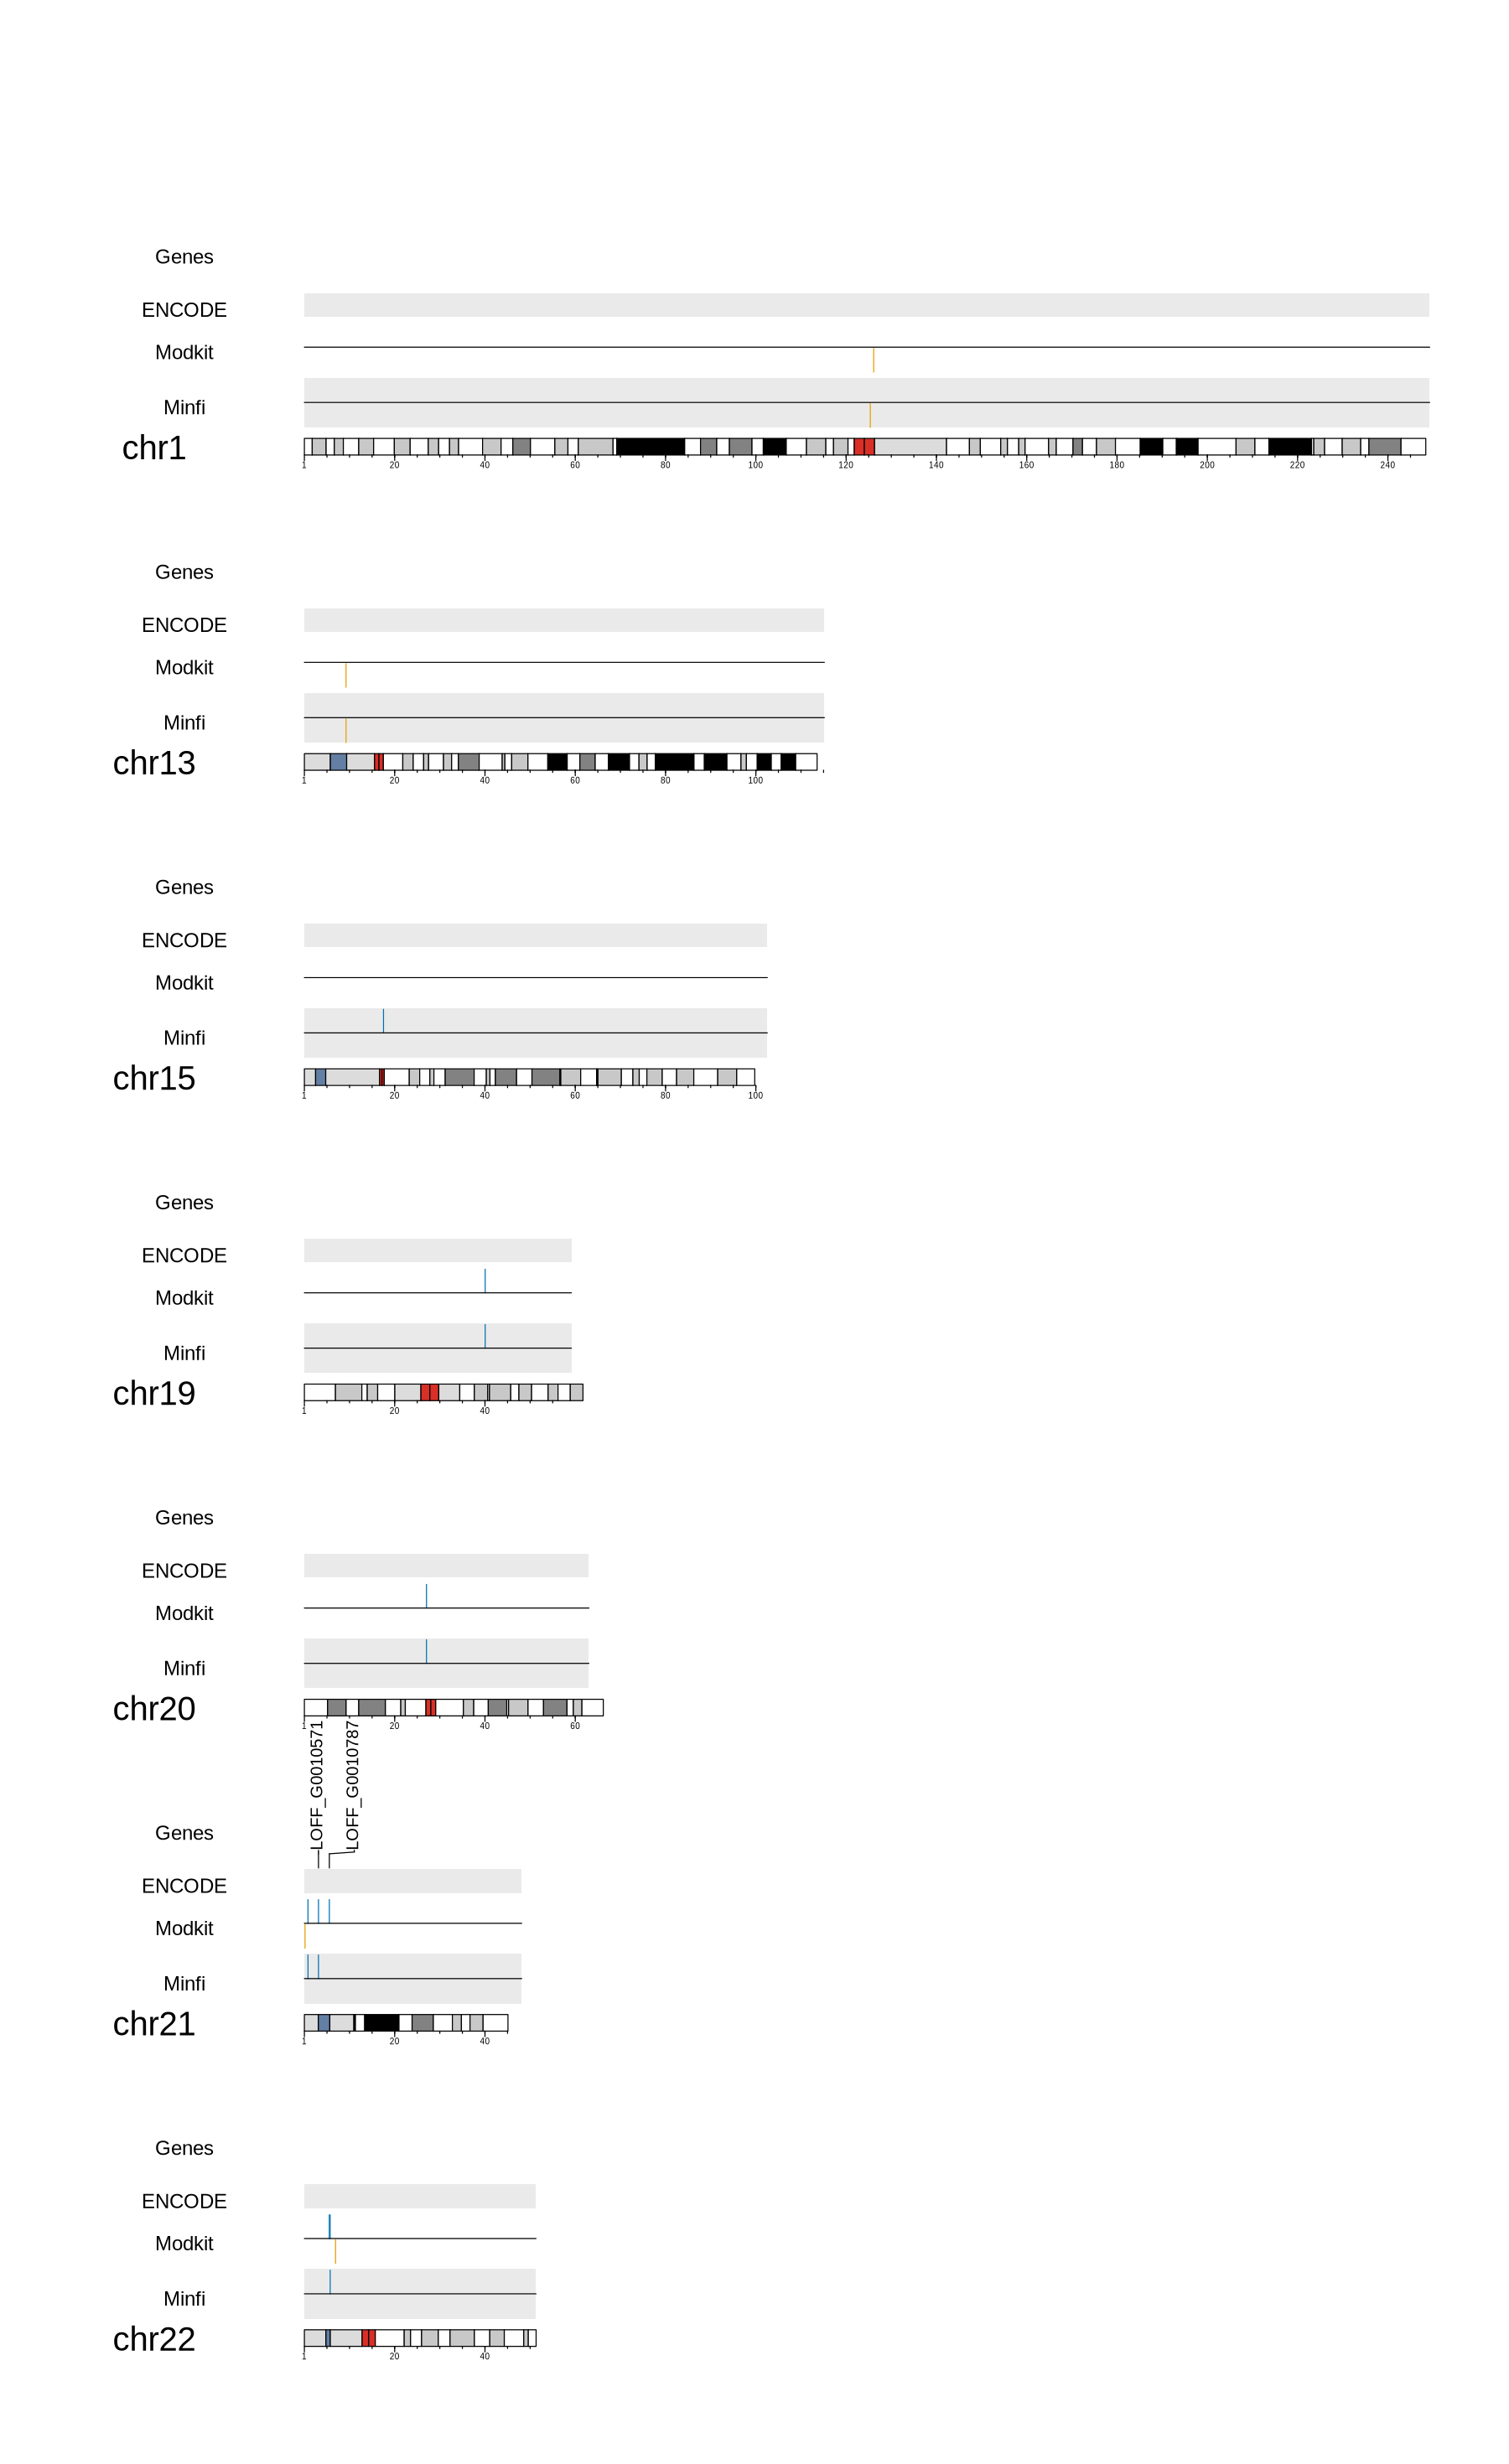

In [28]:
path2_output = paste0("/home/dejlu879/20240731-BEBIC_dmr/pipeline_", name_of_test, "/output_data/")
rdata_fn = paste0(path2_output, 'karyoplotting_vars.', name_of_test, '.Rdata')
load(file = rdata_fn)

# Set plot size based on chromosomes
options(repr.plot.width = 15.0, repr.plot.height = num_chr*3.5)

plot_karyoplot_for_BEBIC_test(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms)


In [29]:
# Print data to talk about

gene_list = my_topgenes_gr$gene_id
LOC_genes = gene_list[grepl("^LOC", gene_list)]
named_genes = gene_list[!grepl("^LOC", gene_list)]
LOFF_genes = named_genes[grepl("^LOFF", named_genes)]
named_genes = named_genes[!grepl("^LOFF", named_genes)]
LINC_genes = named_genes[grepl("^LINC", named_genes)]
named_genes = named_genes[!grepl("^LINC", named_genes)]


encode_list = encode_gr$bind_type
CTCF_binding = encode_list[grepl("CTCF", encode_list)]
H3K27ac_binding = encode_list[grepl("H3K27ac", encode_list)]
H3K27me3_binding = encode_list[grepl("H3K27me3", encode_list)]
H3K36me3_binding = encode_list[grepl("H3K36me3", encode_list)]
H3K4me1_binding = encode_list[grepl("H3K4me1", encode_list)]
H3K9me3_binding = encode_list[grepl("H3K9me3", encode_list)]
H3K4me3_binding = encode_list[grepl("H3K4me3", encode_list)]

print('------------')
print("Number of all genes")
print(length(gene_list))
print("Number of LOC genes")
print(length(LOC_genes))
print("Number of LOFF genes")
print(length(LOFF_genes))
print("Number of LINC genes")
print(length(LINC_genes))
print("Number of named genes")
print(length(named_genes))
print("Number of all binding sites")
print(length(encode_list))
print("Number of CTCF binding sites")
print(length(CTCF_binding))
print("Number of H3K27ac binding sites")
print(length(H3K27ac_binding))
print("Number of H3K27me3 binding sites")
print(length(H3K27me3_binding))
print("Number of H3K36me3 binding sites")
print(length(H3K36me3_binding))
print("Number of H3K4me1 binding sites")
print(length(H3K4me1_binding))
print("Number of H3K9me3 binding sites")
print(length(H3K9me3_binding))
print("Number of H3K4me3 binding sites")
print(length(H3K4me3_binding))


[1] "------------"
[1] "Number of all genes"
[1] 2
[1] "Number of LOC genes"
[1] 0
[1] "Number of LOFF genes"
[1] 2
[1] "Number of LINC genes"
[1] 0
[1] "Number of named genes"
[1] 0
[1] "Number of all binding sites"
[1] 0
[1] "Number of CTCF binding sites"


[1] 0
[1] "Number of H3K27ac binding sites"
[1] 0
[1] "Number of H3K27me3 binding sites"
[1] 0
[1] "Number of H3K36me3 binding sites"
[1] 0
[1] "Number of H3K4me1 binding sites"
[1] 0
[1] "Number of H3K9me3 binding sites"
[1] 0
[1] "Number of H3K4me3 binding sites"
[1] 0


### Test 10

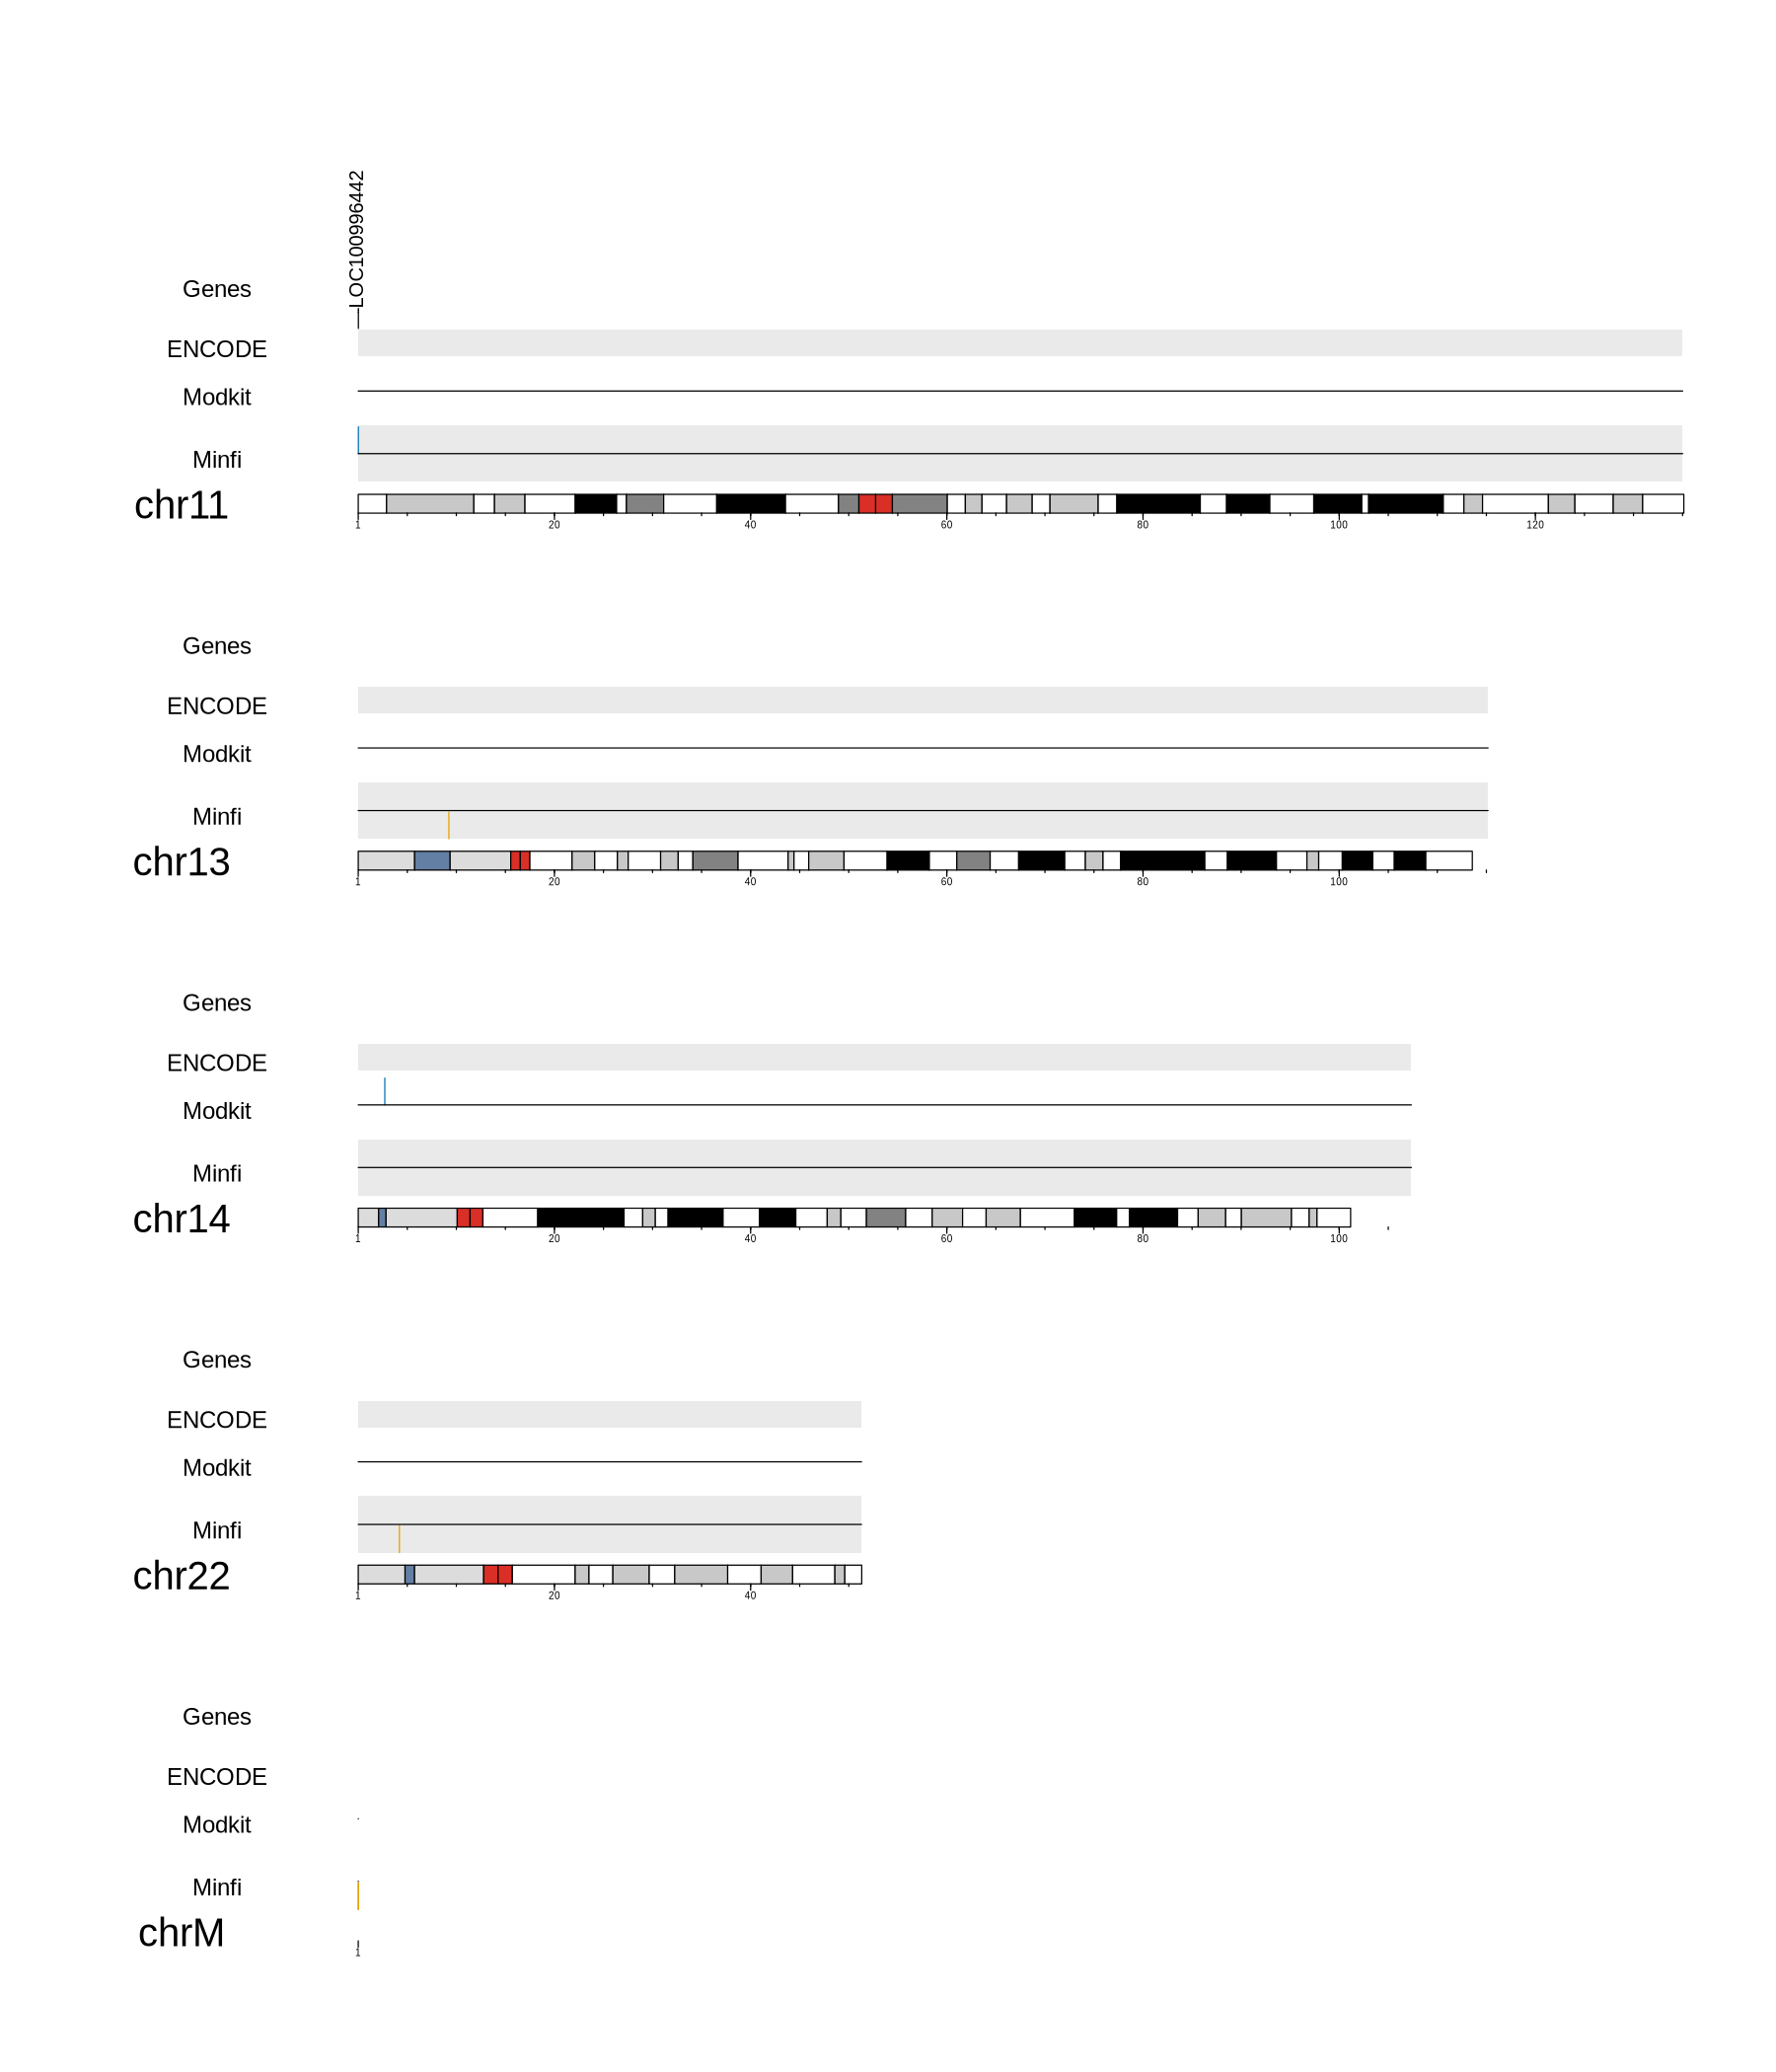

In [30]:
name_of_test = 'test10'

path2_output = paste0("/home/dejlu879/20240731-BEBIC_dmr/pipeline_", name_of_test, "/output_data/")
rdata_fn = paste0(path2_output, 'karyoplotting_vars.', name_of_test, '.Rdata')
load(file = rdata_fn)

# Set plot size based on chromosomes
options(repr.plot.width = 15.0, repr.plot.height = num_chr*3.5)

plot_karyoplot_for_BEBIC_test(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms)

In [31]:
# Print data to talk about

gene_list = my_topgenes_gr$gene_id
LOC_genes = gene_list[grepl("^LOC", gene_list)]
named_genes = gene_list[!grepl("^LOC", gene_list)]
LOFF_genes = named_genes[grepl("^LOFF", named_genes)]
named_genes = named_genes[!grepl("^LOFF", named_genes)]
LINC_genes = named_genes[grepl("^LINC", named_genes)]
named_genes = named_genes[!grepl("^LINC", named_genes)]


encode_list = encode_gr$bind_type
CTCF_binding = encode_list[grepl("CTCF", encode_list)]
H3K27ac_binding = encode_list[grepl("H3K27ac", encode_list)]
H3K27me3_binding = encode_list[grepl("H3K27me3", encode_list)]
H3K36me3_binding = encode_list[grepl("H3K36me3", encode_list)]
H3K4me1_binding = encode_list[grepl("H3K4me1", encode_list)]
H3K9me3_binding = encode_list[grepl("H3K9me3", encode_list)]
H3K4me3_binding = encode_list[grepl("H3K4me3", encode_list)]

print('------------')
print("Number of all genes")
print(length(gene_list))
print("Number of LOC genes")
print(length(LOC_genes))
print("Number of LOFF genes")
print(length(LOFF_genes))
print("Number of LINC genes")
print(length(LINC_genes))
print("Number of named genes")
print(length(named_genes))
print("Number of all binding sites")
print(length(encode_list))
print("Number of CTCF binding sites")
print(length(CTCF_binding))
print("Number of H3K27ac binding sites")
print(length(H3K27ac_binding))
print("Number of H3K27me3 binding sites")
print(length(H3K27me3_binding))
print("Number of H3K36me3 binding sites")
print(length(H3K36me3_binding))
print("Number of H3K4me1 binding sites")
print(length(H3K4me1_binding))
print("Number of H3K9me3 binding sites")
print(length(H3K9me3_binding))
print("Number of H3K4me3 binding sites")
print(length(H3K4me3_binding))


[1] "------------"
[1] "Number of all genes"
[1] 1
[1] "Number of LOC genes"
[1] 1
[1] "Number of LOFF genes"
[1] 0
[1] "Number of LINC genes"
[1] 0
[1] "Number of named genes"
[1] 0
[1] "Number of all binding sites"
[1] 0
[1] "Number of CTCF binding sites"
[1] 0
[1] "Number of H3K27ac binding sites"


[1] 0
[1] "Number of H3K27me3 binding sites"
[1] 0
[1] "Number of H3K36me3 binding sites"
[1] 0
[1] "Number of H3K4me1 binding sites"
[1] 0
[1] "Number of H3K9me3 binding sites"
[1] 0
[1] "Number of H3K4me3 binding sites"
[1] 0


### Test 11

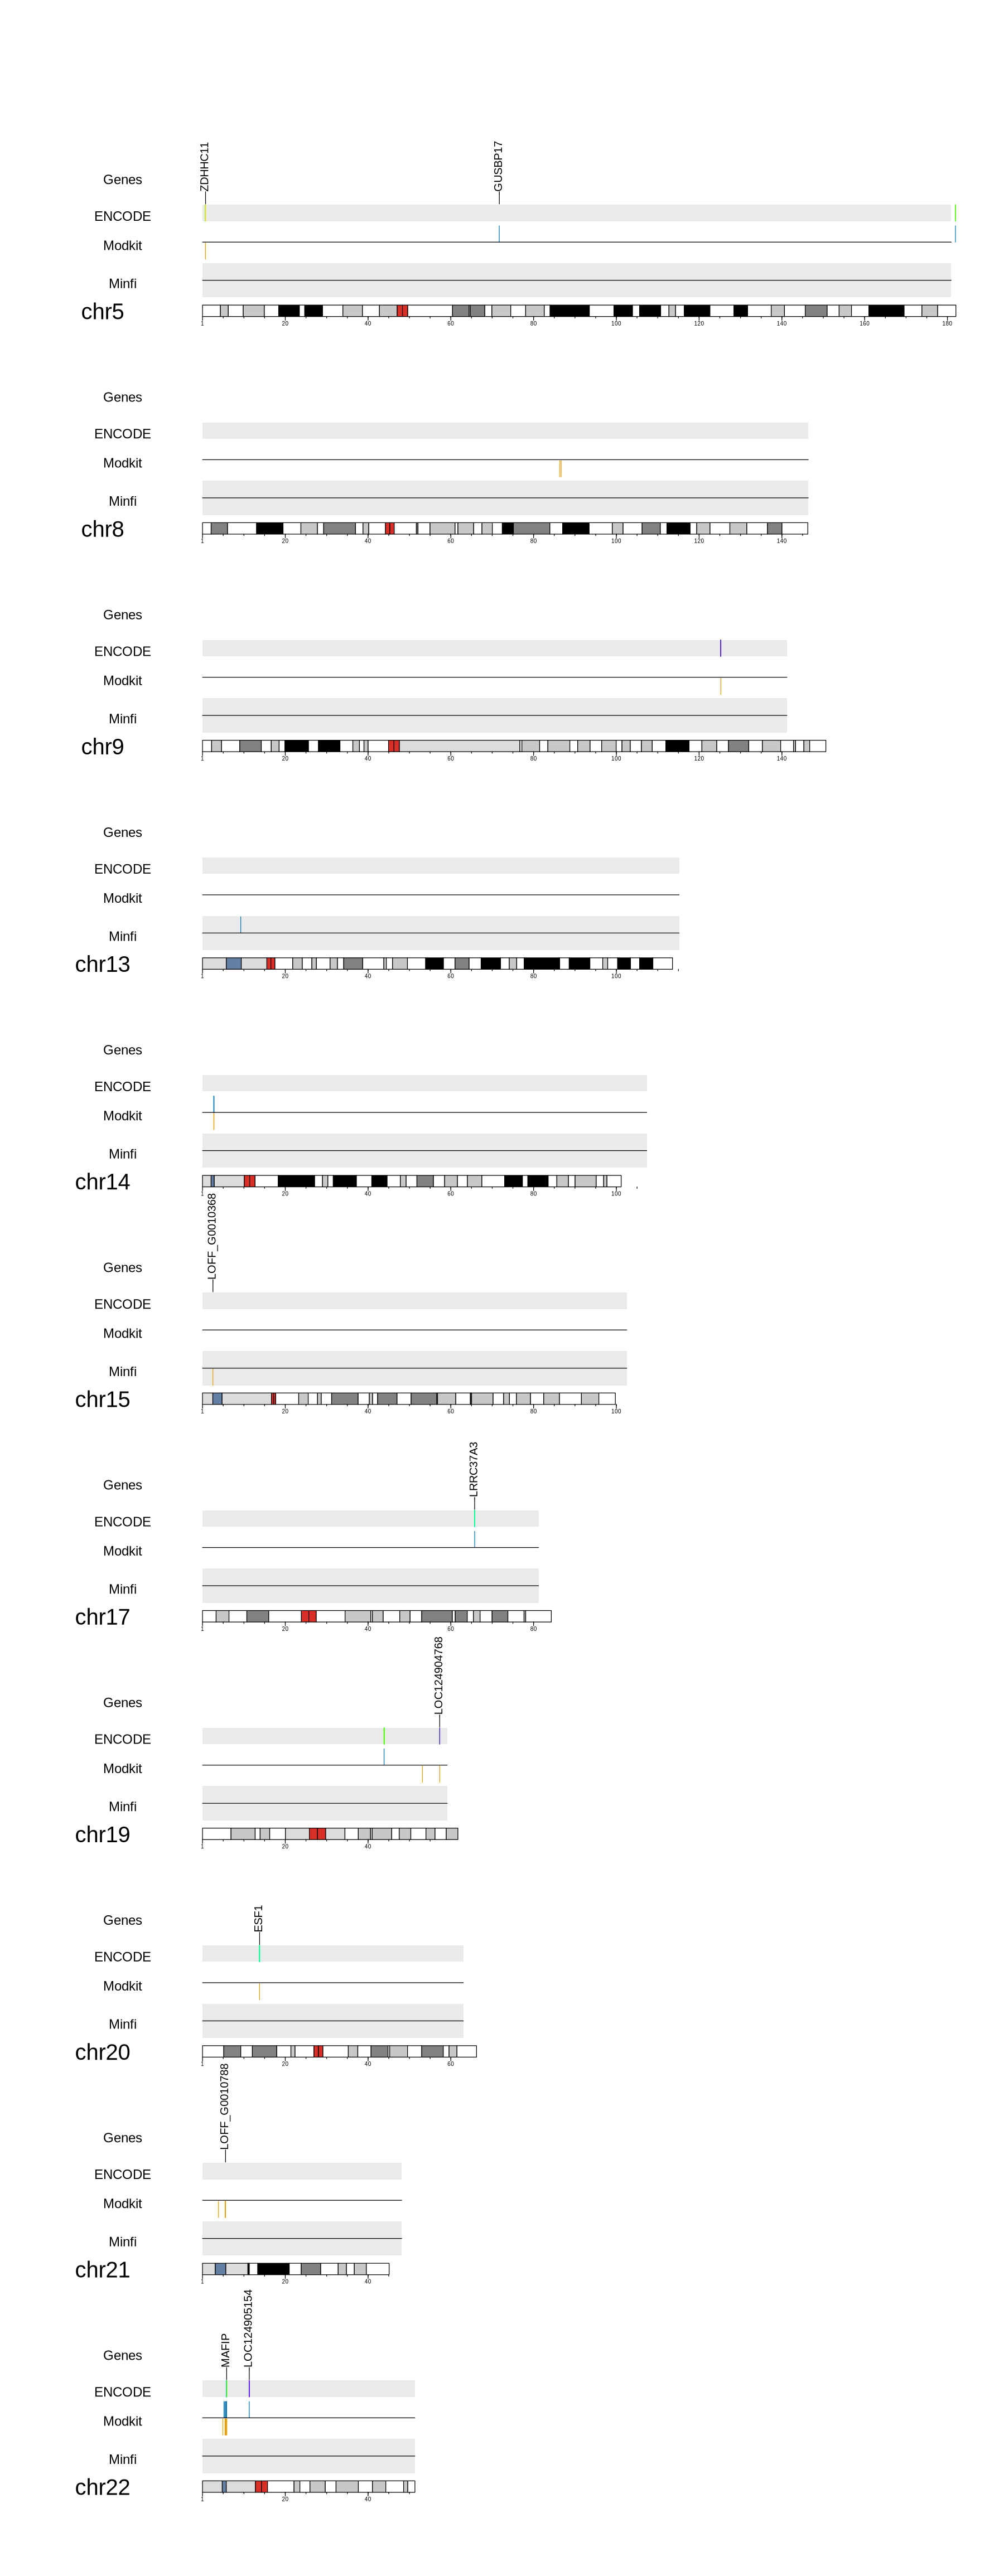

In [13]:
name_of_test = 'test11'

path2_output = paste0("/home/dejlu879/20240731-BEBIC_dmr/pipeline_", name_of_test, "/output_data/")
rdata_fn = paste0(path2_output, 'karyoplotting_vars.', name_of_test, '.Rdata')
load(file = rdata_fn)

# Set plot size based on chromosomes
options(repr.plot.width = 15.0, repr.plot.height = num_chr*3.5)

plot_karyoplot_for_BEBIC_test(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms)

In [14]:
# Print data to talk about

gene_list = my_topgenes_gr$gene_id
LOC_genes = gene_list[grepl("^LOC", gene_list)]
named_genes = gene_list[!grepl("^LOC", gene_list)]
LOFF_genes = named_genes[grepl("^LOFF", named_genes)]
named_genes = named_genes[!grepl("^LOFF", named_genes)]
LINC_genes = named_genes[grepl("^LINC", named_genes)]
named_genes = named_genes[!grepl("^LINC", named_genes)]


encode_list = encode_gr$bind_type
CTCF_binding = encode_list[grepl("CTCF", encode_list)]
H3K27ac_binding = encode_list[grepl("H3K27ac", encode_list)]
H3K27me3_binding = encode_list[grepl("H3K27me3", encode_list)]
H3K36me3_binding = encode_list[grepl("H3K36me3", encode_list)]
H3K4me1_binding = encode_list[grepl("H3K4me1", encode_list)]
H3K9me3_binding = encode_list[grepl("H3K9me3", encode_list)]
H3K4me3_binding = encode_list[grepl("H3K4me3", encode_list)]

print('------------')
print("Number of all genes")
print(length(gene_list))
print("Number of LOC genes")
print(length(LOC_genes))
print("Number of LOFF genes")
print(length(LOFF_genes))
print("Number of LINC genes")
print(length(LINC_genes))
print("Number of named genes")
print(length(named_genes))
print("Number of all binding sites")
print(length(encode_list))
print("Number of CTCF binding sites")
print(length(CTCF_binding))
print("Number of H3K27ac binding sites")
print(length(H3K27ac_binding))
print("Number of H3K27me3 binding sites")
print(length(H3K27me3_binding))
print("Number of H3K36me3 binding sites")
print(length(H3K36me3_binding))
print("Number of H3K4me1 binding sites")
print(length(H3K4me1_binding))
print("Number of H3K9me3 binding sites")
print(length(H3K9me3_binding))
print("Number of H3K4me3 binding sites")
print(length(H3K4me3_binding))


[1] "------------"
[1] "Number of all genes"
[1] 9
[1] "Number of LOC genes"
[1] 2
[1] "Number of LOFF genes"
[1] 2
[1] "Number of LINC genes"
[1] 0
[1] "Number of named genes"
[1] 5
[1] "Number of all binding sites"
[1] 38
[1] "Number of CTCF binding sites"
[1] 0
[1] "Number of H3K27ac binding sites"
[1] 1
[1] "Number of H3K27me3 binding sites"
[1] 13
[1] "Number of H3K36me3 binding sites"
[1] 15
[1] "Number of H3K4me1 binding sites"
[1] 0
[1] "Number of H3K9me3 binding sites"
[1] 9
[1] "Number of H3K4me3 binding sites"
[1] 0


### Test12

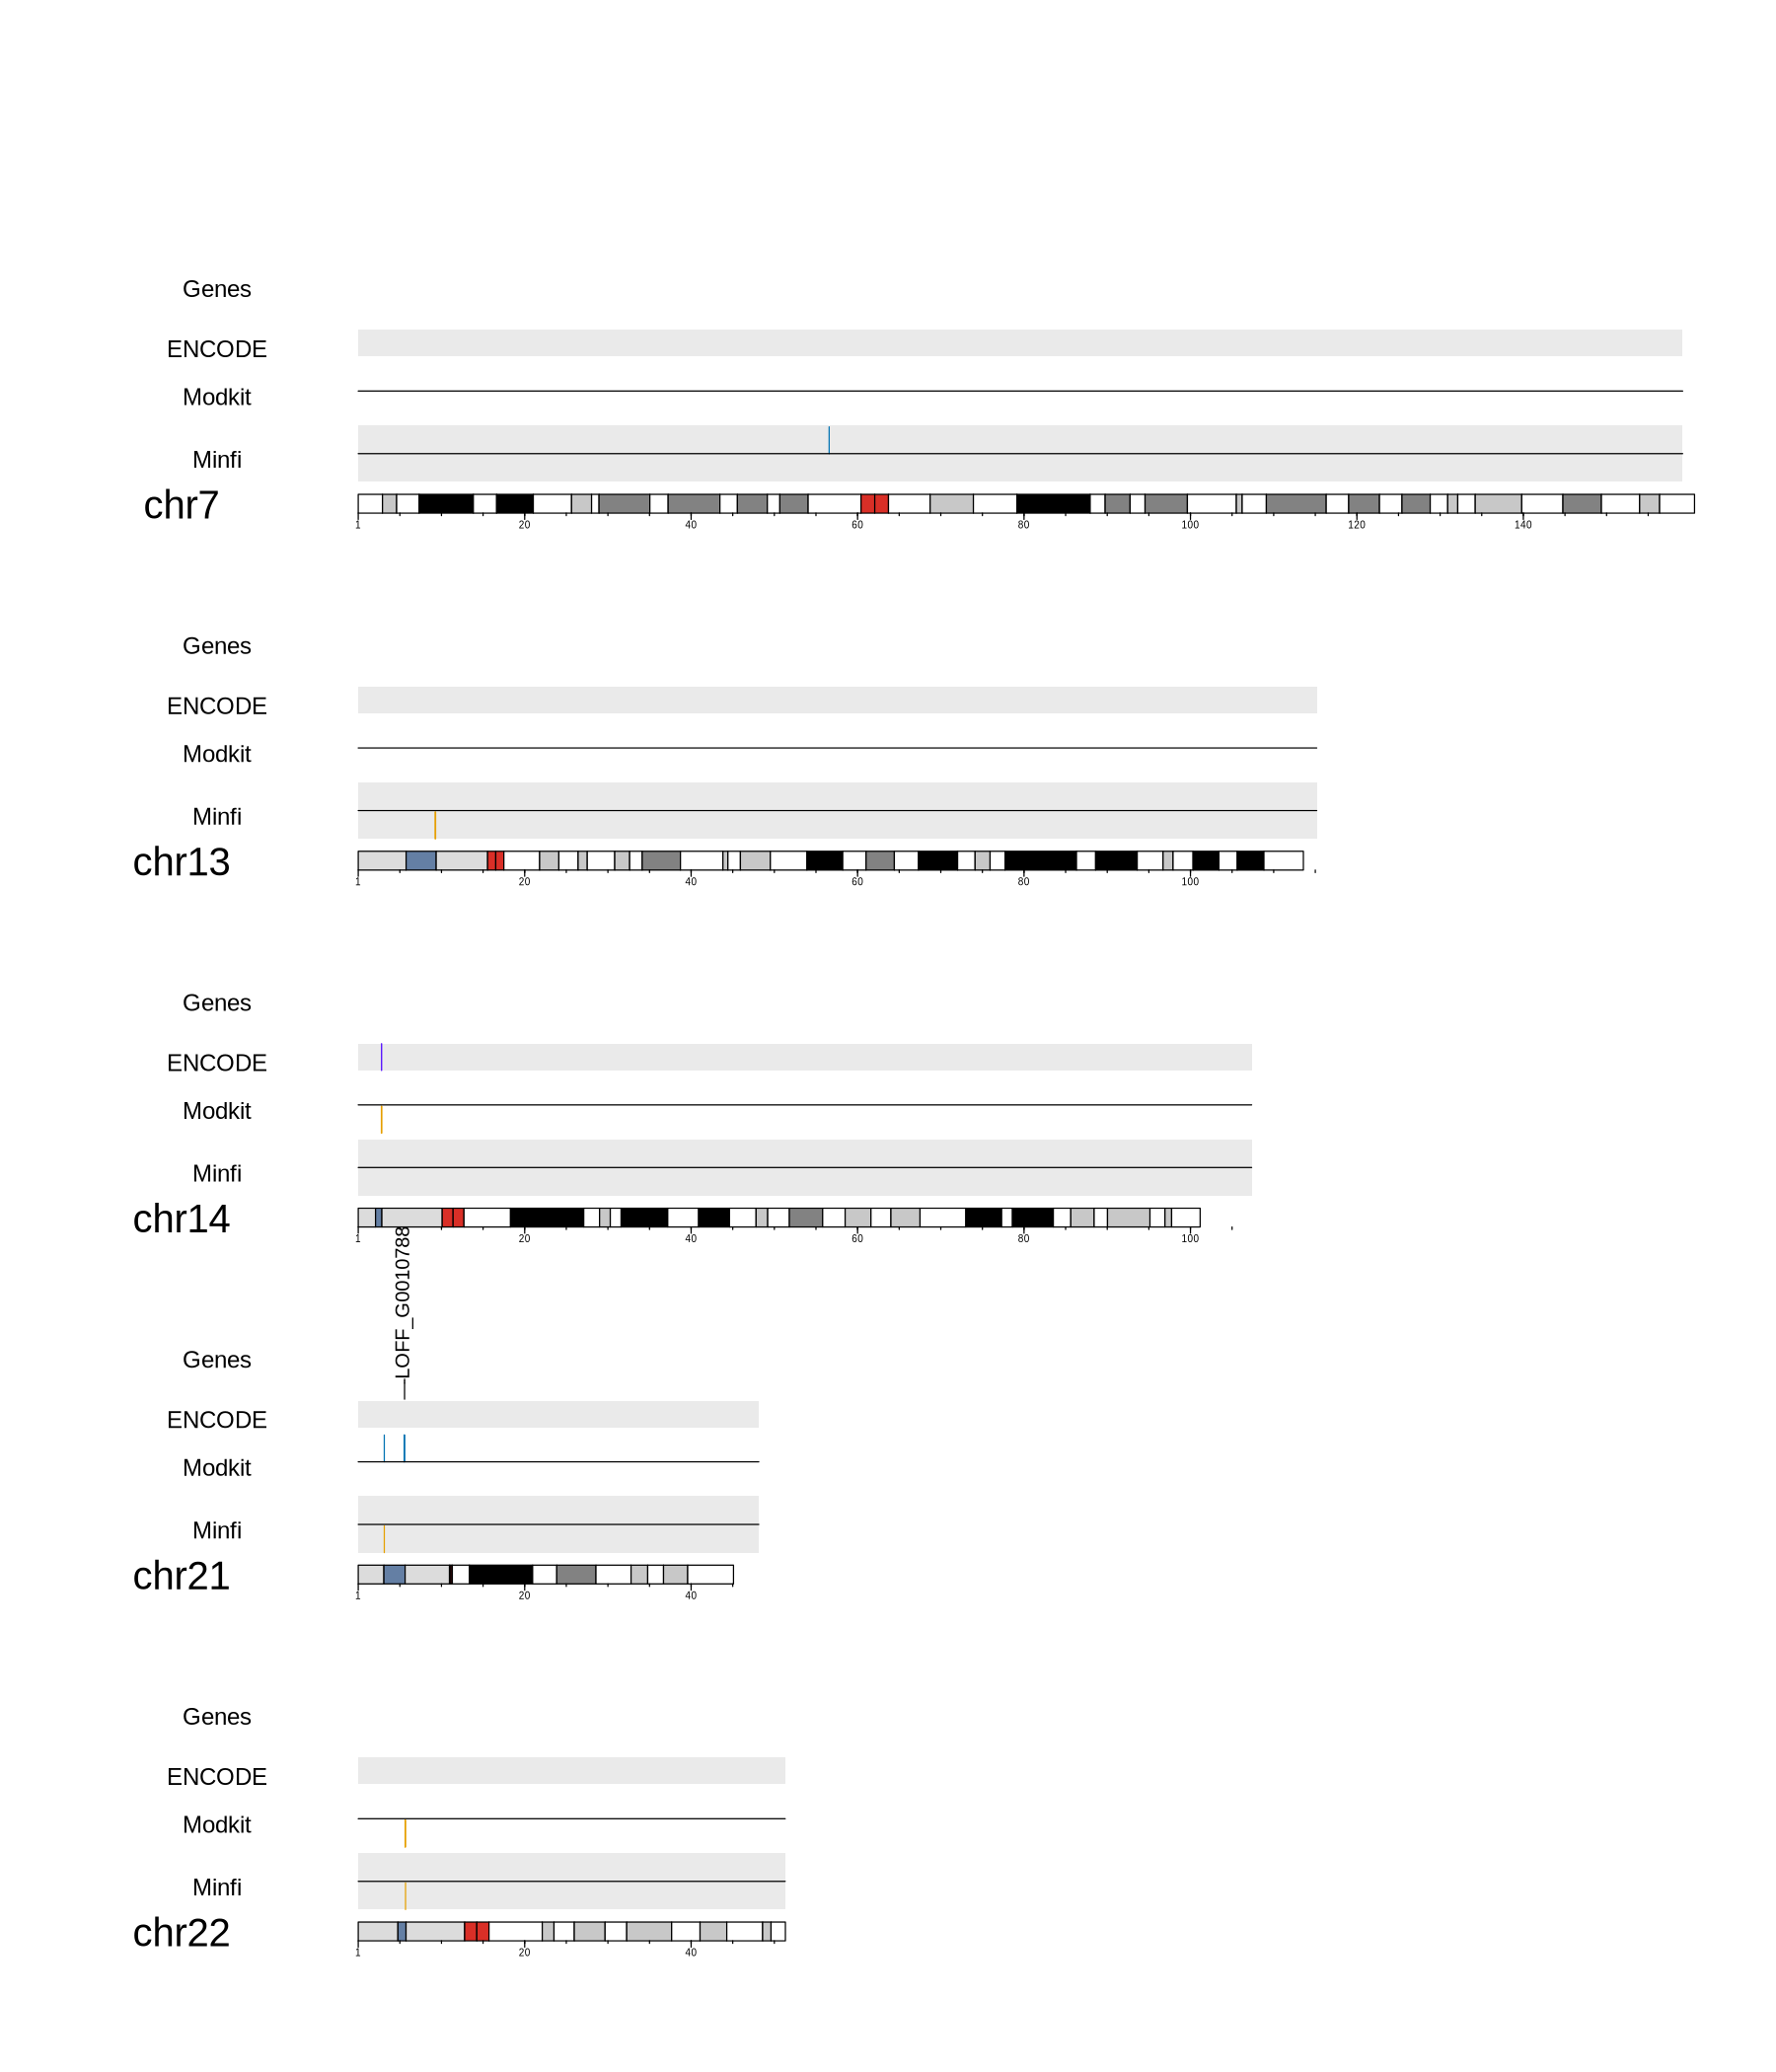

In [32]:
name_of_test = 'test12'

path2_output = paste0("/home/dejlu879/20240731-BEBIC_dmr/pipeline_", name_of_test, "/output_data/")
rdata_fn = paste0(path2_output, 'karyoplotting_vars.', name_of_test, '.Rdata')
load(file = rdata_fn)

# Set plot size based on chromosomes
options(repr.plot.width = 15.0, repr.plot.height = num_chr*3.5)

plot_karyoplot_for_BEBIC_test(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms)

In [33]:
# Print data to talk about

gene_list = my_topgenes_gr$gene_id
LOC_genes = gene_list[grepl("^LOC", gene_list)]
named_genes = gene_list[!grepl("^LOC", gene_list)]
LOFF_genes = named_genes[grepl("^LOFF", named_genes)]
named_genes = named_genes[!grepl("^LOFF", named_genes)]
LINC_genes = named_genes[grepl("^LINC", named_genes)]
named_genes = named_genes[!grepl("^LINC", named_genes)]


encode_list = encode_gr$bind_type
CTCF_binding = encode_list[grepl("CTCF", encode_list)]
H3K27ac_binding = encode_list[grepl("H3K27ac", encode_list)]
H3K27me3_binding = encode_list[grepl("H3K27me3", encode_list)]
H3K36me3_binding = encode_list[grepl("H3K36me3", encode_list)]
H3K4me1_binding = encode_list[grepl("H3K4me1", encode_list)]
H3K9me3_binding = encode_list[grepl("H3K9me3", encode_list)]
H3K4me3_binding = encode_list[grepl("H3K4me3", encode_list)]

print('------------')
print("Number of all genes")
print(length(gene_list))
print("Number of LOC genes")
print(length(LOC_genes))
print("Number of LOFF genes")
print(length(LOFF_genes))
print("Number of LINC genes")
print(length(LINC_genes))
print("Number of named genes")
print(length(named_genes))
print("Number of all binding sites")
print(length(encode_list))
print("Number of CTCF binding sites")
print(length(CTCF_binding))
print("Number of H3K27ac binding sites")
print(length(H3K27ac_binding))
print("Number of H3K27me3 binding sites")
print(length(H3K27me3_binding))
print("Number of H3K36me3 binding sites")
print(length(H3K36me3_binding))
print("Number of H3K4me1 binding sites")
print(length(H3K4me1_binding))
print("Number of H3K9me3 binding sites")
print(length(H3K9me3_binding))
print("Number of H3K4me3 binding sites")
print(length(H3K4me3_binding))


[1] "------------"
[1] "Number of all genes"
[1] 1
[1] "Number of LOC genes"
[1] 0
[1] "Number of LOFF genes"
[1] 1
[1] "Number of LINC genes"
[1] 0
[1] "Number of named genes"
[1] 0
[1] "Number of all binding sites"
[1] 1
[1] "Number of CTCF binding sites"
[1] 0
[1] "Number of H3K27ac binding sites"
[1] 0
[1] "Number of H3K27me3 binding sites"
[1] 0
[1] "Number of H3K36me3 binding sites"
[1] 0
[1] "Number of H3K4me1 binding sites"


[1] 0
[1] "Number of H3K9me3 binding sites"
[1] 1
[1] "Number of H3K4me3 binding sites"
[1] 0
